# `PROYEK AKHIR MODUL 2 - TRANSAKSI TRANSPORTASI UMUM TRANSJAKARTA -`

**OLEH: JUSTIFY ESTER PASARIBU (JCDS 0406 006)**

**Berdasarkan Dataset dari Kaggle yang dapat Diaskes [disini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction/data), untuk memahami lebih dalam mengenai dataset Public Transportation Transaction Transjakarta. Berikut ini Pemahaman Dasar dari Dataset :**

> **TENTANG DATASET**

Dataset ini adalah simulasi data transaksi Transjakarta, dibuat untuk memfasilitasi analisis dan pengembangan model data. Setiap transaksi memiliki ID unik, informasi kartu pembayaran termasuk bank penerbit, nama pemegang, jenis kelamin, dan tanggal lahir pemegang kartu. Data juga mencakup ID koridor, nama koridor, arah rute, informasi pemberhentian (termasuk garis lintang dan bujur), urutan pemberhentian, waktu tap-in dan tap-out, serta jumlah pembayaran.

> **KONTEKS**

Transjakarta adalah perusahaan transportasi umum di Jakarta, Indonesia, menggunakan bus besar, bus sedang, dan bus mini. Sistem pembayaran menggunakan kartu tap-in dan tap-out. Dataset ini tidak mewakili data transaksi nyata Transjakarta tetapi memberikan kerangka untuk analisis model transportasi umum.

> **KONTEN**

Dataset ini menyediakan informasi terperinci tentang transaksi simulasi, mencakup aspek-aspek seperti rute, waktu perjalanan, dan biaya. Ini berguna untuk menganalisis pola perjalanan penumpang dan efisiensi rute.

> **INSPIRASI**

Dataset ini dapat digunakan untuk memahami dinamika transportasi umum di Jakarta. Analisis ini dapat membantu mengidentifikasi rute yang sibuk, potensi kemacetan, dan preferensi penumpang, serta mendukung perencanaan rute yang lebih efisien.

---

# `PEMANGKU KEPENTINGAN: Divisi Manajemen Operasional TransJakarta`

Memilih Divisi Manajemen Operasional Transjakarta sebagai pemangku kepentingan yang tepat berdasarkan dataset Transjakarta adalah pilihan yang sesuai karena:

- **Relevansi Data:** Dataset ini menyediakan informasi mendetail tentang transaksi perjalanan yang sangat berguna untuk manajemen operasional.
- **Fokus pada Operasional:** Divisi ini berfokus pada pengelolaan operasi sehari-hari, efisiensi rute, dan peningkatan kualitas layanan, yang semua aspeknya dapat dianalisis menggunakan dataset Transjakarta.

# `LATAR BELAKANG`

Manajemen Operasional Transjakarta menghadapi tantangan dalam mengoptimalkan operasi dan meningkatkan layanan bagi penumpang. Efisiensi rute, waktu tunggu, kepadatan penumpang, dan pendapatan adalah beberapa area kunci yang membutuhkan perhatian. Dataset Transjakarta menyediakan data transaksi yang dapat digunakan untuk menganalisis aspek-aspek ini dan memberikan wawasan untuk peningkatan layanan.

# `PERNYATAAN MASALAH`

Divisi Manajemen Operasional Transjakarta menghadapi tantangan dalam memahami **bagaimana pola pergerakan penumpang dan faktor-faktor yang mempengaruhinya** untuk meningkatkan efisiensi layanan dan kepuasan pelanggan. Mereka perlu mengoptimalkan jadwal, mengatur alokasi sumber daya, dan mengidentifikasi area untuk peningkatan layanan.

Sebagai seorang analis data akan mencoba menjawab pertanyaan berikut:

**Bagaimana kita dapat menggunakan analisis data untuk memahami dan mengoptimalkan pola pergerakan penumpang dan kepadatan rute demi meningkatkan efisiensi operasional Transjakarta?**

---
Berdasarkan pernyataan masalah yang dijelaskan di atas, berikut ini adalah pertanyaan-pertanyaan yang akurat sesuai dengan pernyataan masalah tersebut:

**1. Bagaimana pola pergerakan penumpang di berbagai rute?**
- Justifikasi: Memahami pola ini akan membantu dalam menyesuaikan jadwal dan rute untuk mengurangi waktu tunggu dan penumpukan penumpang.
- Kolom Relevan: waktu masuk, waktu keluar, nama koridor, arah.
- Bantuan Analis Data: Menganalisis waktu dan frekuensi perjalanan untuk mengidentifikasi rute yang sibuk.

**2. Apakah ada rute yang secara konsisten mengalami kepadatan penumpang?**
- Justifikasi: Mengidentifikasi rute yang padat akan membantu dalam alokasi sumber daya dan armada yang lebih baik.
- Kolom Relevan: id transaksi, nama koridor, halte masuk, halte keluar.
- Bantuan Analis Data: Menghitung jumlah transaksi per rute untuk menentukan kepadatan.

**Analisis dari pertanyaan-pertanyaan ini akan membantu Divisi Manajemen Operasional Transjakarta dalam membuat keputusan yang lebih informatif dan strategis untuk meningkatkan efisiensi operasional.**

---

# **_IMPORT LIBRARY_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import regex as regex
#from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

---

# **_DATA UNDERSTANDING & DATA CLEANING_**

In [2]:
dfJEP = pd.read_csv("TransjakartaOriginal.csv")

In [3]:
display(dfJEP.head(),dfJEP.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [4]:
#Menampilkan Informasi Dataset `Transjakarta.csv`:

print(f'Jumlah Baris dan Kolom Pada Dataset adalah {dfJEP.shape}')
print()
dfJEP.info()

Jumlah Baris dan Kolom Pada Dataset adalah (37900, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [5]:
#Menampilkan nama kolom-kolom di dataset:
print("Nama Kolom-kolom Pada Dataset: ")
print(dfJEP.columns)

#Menampilkan jumlah kolom pada dataset:
print("\nTotal Keseluruhan Kolom Pada Dataset:", len(dfJEP.columns))

Nama Kolom-kolom Pada Dataset: 
Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

Total Keseluruhan Kolom Pada Dataset: 22


---

> ### **Informasi Terkait Variabel/Kolom pada Dataset**

Dataset ini berisi informasi tentang Transaksi Transportasi Umum Transjakarta. Untuk mengetahui lebih lanjut tentang dataset Transaksi Transportasi Umum Transjakarta, Anda dapat melihatnya [di sini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo). Terdapat 22 kolom dalam dataset `Transjakarta.csv`. Berikut ini adalah penjelasan dari setiap kolomnya:

1. `transID:` ID transaksi yang unik untuk setiap transaksi.
2. `payCardID:` Pengidentifikasi utama pelanggan, yaitu kartu yang digunakan sebagai tiket masuk dan keluar.
3. `payCardBank:` Nama bank penerbit kartu pelanggan.
4. `payCardName:` Nama pelanggan yang tertulis di kartu.
5. `payCardSex:` Jenis kelamin pelanggan yang tertulis di kartu.
6. `payCardBirthDate:` Tanggal lahir pelanggan.
7. `corridorID:` ID Koridor atau ID Rute sebagai kunci untuk pengelompokan rute.
8. `corridorName:` Nama Koridor atau Nama Rute yang mencakup awal dan akhir untuk setiap rute.
9. `direction:` 0 untuk pergi, 1 untuk kembali. Menunjukkan arah rute.
10. `tapInStops:` ID pemberhentian masuk (tap in) untuk mengidentifikasi nama pemberhentian.
11. `tapInStopsName:` Nama pemberhentian masuk di mana pelanggan melakukan tap in.
12. `tapInStopsLat:` Lintang dari pemberhentian masuk.
13. `tapInStopsLon:` Bujur dari pemberhentian masuk.
14. `stopStartSeq:` Urutan pemberhentian, misalnya pemberhentian pertama, kedua, dan seterusnya. Berkaitan dengan arah.
15. `tapInTime:` Waktu tap in. Tanggal dan waktu.
16. `tapOutStops:` ID pemberhentian keluar (tap out) untuk mengidentifikasi nama pemberhentian.
17. `tapOutStopsName:` Nama pemberhentian keluar di mana pelanggan melakukan tap out.
18. `tapOutStopsLat:` Lintang dari pemberhentian keluar.
19. `tapOutStopsLon:` Bujur dari pemberhentian keluar.
20. `stopEndSeq:` Urutan pemberhentian, misalnya pemberhentian pertama, kedua, dan seterusnya. Berkaitan dengan arah.
21. `tapOutTime:` Waktu tap out. Tanggal dan waktu.
22. `payAmount:` Jumlah yang dibayar oleh pelanggan. Beberapa gratis, beberapa tidak.

> ### **Analisa Pribadi Terkait Variabel/Kolom Dataset**

1. **Identitas Pembayaran dan Pengguna Kartu:**
- `payCardID:` ID kartu pembayaran.
- `payCardBank:`Bank penerbit kartu.
- `payCardName:`Nama pemegang kartu.
- `payCardSex:` Jenis kelamin pemegang kartu.
- `payCardBirthDate:` Tanggal lahir pemegang kartu.

2. **Informasi Koridor:**
- `corridorID:` ID koridor bus.
- `corridorName:` Nama koridor bus.

3. **Informasi Naik dan Turun:**
- `tapInStops dan tapOutStops:` ID pemberhentian tempat penumpang naik dan turun.
- `tapInStopsName dan tapOutStopsName:` Nama pemberhentian tempat penumpang naik dan turun.
- `tapInStopsLat, tapInStopsLon, tapOutStopsLat, dan tapOutStopsLon:` Koordinat geografis (latitude dan longitude) pemberhentian tempat penumpang naik dan turun.

4. **Informasi Waktu dan Urutan Pemberhentian:**
- `tapInTime dan tapOutTime:` Waktu ketika penumpang men-tap in dan men-tap out.
- `stopStartSeq dan stopEndSeq:` Urutan pemberhentian tempat penumpang naik dan turun.

5. **Informasi Tarif:**
- `payAmount:` Jumlah tarif yang dibayarkan.

6. **Informasi Tambahan:**
- `transID:` ID transaksi.
- `direction:` Arah perjalanan.

---

### **(MENCOBA) MELAKUKAN EDA MENGGUNAKAN LIBRARY YDATA PROFILING NAMUN MENGALAMI KENDALA VERSION DARI LIBRARY DAN VSC JADINYA BISA MENAMPILKAN OUTPUT DALAM BENTUK LINK GOOGLE DRIVE: [disini](https://drive.google.com/drive/folders/1Ol7CTp2Ysj4HCbh42FwQvgNvknoD13-f?usp=sharing)**

In [6]:
# profile = ProfileReport(
#     dfJEP, 
#     title="Pandas Profiling Report",
#     explorative=True,
#     plot={"dpi": 200, "image_format": "png"},
#     correlations = {
#         "auto": {"calculate": True}
#     # "pearson": {"calculate": True},
#     # "spearman": {"calculate": True},
#     # "kendall": {"calculate": True},
#     # "cramers": {"calculate": True},
#     # "phi_k": {"calculate": True}
# })
# profile

### **Interprestasi:**

1. **Berdasarkan Analisis EDA menggunakan Library Ydata Profiling, terdapat variabel(kolom) types:** 
- **Text (8)** : transid, paycardname, corridorid, corridorname, tapinstops, tapinstopsname, tapoutstops, tapoutstopsname
- **Numeric (8)** : paycardid, paycardbirthdate, tapinstopslat, tapinstopslon, stopstartseq, tapoutstopslat, tapoutstopslon, stopendseq
- **Categorical (4)** : paycardbank, paycardsex, direction, payamount
- **Date Time (2)** : tapintime, tapouttime
    
2. **Terdeteksi bahwa ada 10 kolom yang memiliki missing value, kolom-kolom tersebut adalah:** 
    
- corridorID has 1257 (3.3%) missing values	Missing
- corridorName has 1930 (5.1%) missing values	Missing
- tapInStops has 1213 (3.2%) missing values	Missing
- tapOutStops has 2289 (6.0%) missing values	Missing
- tapOutStopsName has 1344 (3.5%) missing values	Missing
- tapOutStopsLat has 1344 (3.5%) missing values	Missing
- tapOutStopsLon has 1344 (3.5%) missing values	Missing
- stopEndSeq has 1344 (3.5%) missing values	Missing
- tapOutTime has 1344 (3.5%) missing values	Missing
- payAmount has 1007 (2.7%) missing values

3. **Beberapa komponen-komponen lainnya, seperti:**

- Number of variables: Ini menunjukkan jumlah total variabel atau kolom dalam dataset. Dalam hal ini, ada 22 variabel.
- Number of observations: Ini adalah jumlah baris atau entri dalam dataset, dengan total 37.900 observasi.
- Missing cells: Ini menunjukkan jumlah sel yang kosong atau tidak memiliki data. Terdapat 14.416 sel kosong, yang merupakan 1,7% dari keseluruhan dataset, menunjukkan bahwa dataset cukup lengkap dengan persentase data yang hilang yang relatif rendah.
- Duplicate rows: Persentase baris yang duplikat dalam dataset ini adalah 0%, yang berarti tidak ada entri yang sepenuhnya sama.

---

> ### **Tahapan: Konsistensi Format Penulisan Nama Setiap Kolom**

In [7]:
# Fungsi untuk memeriksa apakah nama kolom dalam format yang konsisten
def is_inconsistent_format(col_name):
    # Format yang dianggap tidak konsisten: tidak snake_case dan tidak camelCase
    return not ("_" in col_name or col_name.islower() or col_name.isupper())

# Mencari kolom yang formatnya tidak konsisten
inconsistent_columns = [col for col in dfJEP.columns if is_inconsistent_format(col)]

# Menampilkan nama kolom yang formatnya tidak konsisten
inconsistent_columns

['transID',
 'payCardID',
 'payCardBank',
 'payCardName',
 'payCardSex',
 'payCardBirthDate',
 'corridorID',
 'corridorName',
 'tapInStops',
 'tapInStopsName',
 'tapInStopsLat',
 'tapInStopsLon',
 'stopStartSeq',
 'tapInTime',
 'tapOutStops',
 'tapOutStopsName',
 'tapOutStopsLat',
 'tapOutStopsLon',
 'stopEndSeq',
 'tapOutTime',
 'payAmount']

### **Interprestasi:**

- Terlihat diatas bahwa nama kolom-kolom tidak konsisten, maka perlu diubah setiap nama kolom yang tidak konsisten agar satu nama kolom konsisten dengan nama kolom lainnya.

In [8]:
# Mengubah semua nama kolom menjadi huruf kecil (lower case)

# Mengubah nama kolom
dfJEP.columns = [col.lower() for col in dfJEP.columns]

# Menampilkan nama kolom yang telah diubah
dfJEP.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount'],
      dtype='object')

### **Interprestasi:**

- Setiap nama kolom yang tidak konsisten diubah semuanya menjadi lowercase agar nama 22 kolom saling konsisten.

In [9]:
# Memperbarui kode untuk mengecek kolom yang formatnya tidak konsisten

# Fungsi untuk memeriksa apakah nama kolom dalam format yang konsisten
def is_inconsistent_format(col_name):
    # Format yang dianggap tidak konsisten: tidak snake_case dan tidak camelCase
    return not ("_" in col_name or col_name.islower() or col_name.isupper())

# Mencari kolom yang formatnya tidak konsisten
inconsistent_columns = [col for col in dfJEP.columns if is_inconsistent_format(col)]

# Menampilkan nama kolom yang formatnya tidak konsisten atau pesan jika semuanya konsisten
if inconsistent_columns:
    inconsistent_columns
else:
    print("Nama Kolom-kolom Sudah Konsisten")

Nama Kolom-kolom Sudah Konsisten


### **Interprestasi:**

- Kembali dilakukan pengecekan nama-nama kolom dan sekarang 22 nama kolom sudah konsisten.

In [10]:
# Kembali menampilkan isi nama-nama kolom pada dataset.
dfJEP.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount'],
      dtype='object')

---

> ### **Tahapan: Cek Missing Values & Handling Missing Values**

In [11]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in dfJEP.columns :
    listItem.append( [col, dfJEP[col].nunique(), dfJEP[col].unique(), dfJEP[col].isna().sum()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Missing Values'], data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Missing Values
0,transid,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]",0
1,paycardid,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]",0
2,paycardbank,6,"[emoney, dki, flazz, online, brizzi, bni]",0
3,paycardname,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugro

### **Interpretasi:**

- Dataset memiiliki 37.900 baris dan 22 kolom
- Tipe data yang digunakan adalah kombinasi dari objek(string), integer, dan float.
- Kemudian menampilkan informasi tambahan tentang dataset, seperti jumlah nilai unik, sample data nilai unik, dan jumlah missing value untuk setiap kolomnya
- Ada beberapa yang memiliki nilai null/missing value, pada kolom: `corridorid`, `corridorname`, `tapinstops`, `tapoutstops`, `	tapoutstopsname`, `tapoutstopslat`, `tapoutstopslon`, `stopendseq`,  `tapouttime`, `payamount`, data kosong pada kolom-kolom tersebut diwakili dengan data nan.

> ### STATISTIKA DESKRIPTIF

- tujuannya untuk menjelaskan dan merangkum data dalam cara yang mudah dipahami. karena melibatkan pengukuran seperti mean, median, modus, ranges, dan standar deviasi. 
- gunanya biasanya dilakukan diawal proses analisis untuk mendapatkan gambaran umum dari dataset.

In [12]:
# Menampilkan Ringkasan Statistik untuk Kolom Numerik dan Kolom Kategorikal (Non-Numerik)

display(dfJEP.describe(), dfJEP.describe(include='object'))

,paycardid,paycardbirthdate,direction,tapinstopslat,tapinstopslon,stopstartseq,tapoutstopslat,tapoutstopslon,stopendseq,payamount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transid,paycardbank,paycardname,paycardsex,corridorid,corridorname,tapinstops,tapinstopsname,tapintime,tapoutstops,tapoutstopsname,tapouttime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


### **Interpretasi:**

`Statistik Deskriptif Numerik:`
1. Count: Terdapat 37,900 observasi untuk kebanyakan variabel, namun beberapa seperti 'tapoutstopslat', 'tapoutstopslon', 'stopendseq', dan 'payamount' memiliki jumlah observasi yang sedikit lebih rendah, menunjukkan adanya nilai yang hilang.
2. Mean (Rata-rata):
- paycardbirthdate: Rata-rata tahun kelahiran pengguna adalah sekitar 1990.
- direction: Nilai rata-rata mendekati 0.5, yang bisa menunjukkan distribusi yang merata antara dua arah yang mungkin (misalnya, masuk dan keluar).
- payamount: Rata-rata pembayaran adalah sekitar 2699.71.
3.  Std (Standar Deviasi): Variabilitas pada 'payamount' dan 'paycardid' sangat tinggi.
4. Min dan Max: Menunjukkan rentang data, seperti pada 'payamount' yang berkisar dari 0 hingga 20,000.
5. Percentiles (Persentil): 50% (median) pembayaran adalah 3500, tapi 25% pertama adalah 0, menunjukkan distribusi yang tidak merata.

`Statistik Deskriptif Kategorikal:`
1. Count: Semua variabel memiliki 37,900 observasi kecuali beberapa dengan nilai yang hilang.
2. Unique: Variabel seperti 'paycardname' memiliki banyak nilai unik (1993), menunjukkan keragaman yang tinggi.
3. Top dan Freq: Menunjukkan nilai paling umum dan frekuensinya, seperti 'paycardbank' dengan 'dki' sebagai bank teratas.

### **Justifikasi:**
- Konsistensi Data: Jumlah observasi yang konsisten di sebagian besar kolom menunjukkan integritas data yang baik.
- Identifikasi Outliers: Standar deviasi yang tinggi pada **`payamount` dan `paycardid` bisa menandakan adanya outliers.**
- Analisis Distribusi: Persentil membantu memahami distribusi data, misalnya, **sebaran `payamount` yang tidak merata.**

> ### VISUALISASI: STATISTIKA DESKRIPTIF

In [13]:
numerical_columns = dfJEP.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = dfJEP.select_dtypes(include=['object']).columns.tolist()

identified_columns = {
    "Kolom Numerik": numerical_columns,
    "Kolom Kategorikal": categorical_columns
}

identified_columns

{'Kolom Numerik': ['paycardid',
  'paycardbirthdate',
  'direction',
  'tapinstopslat',
  'tapinstopslon',
  'stopstartseq',
  'tapoutstopslat',
  'tapoutstopslon',
  'stopendseq',
  'payamount'],
 'Kolom Kategorikal': ['transid',
  'paycardbank',
  'paycardname',
  'paycardsex',
  'corridorid',
  'corridorname',
  'tapinstops',
  'tapinstopsname',
  'tapintime',
  'tapoutstops',
  'tapoutstopsname',
  'tapouttime']}

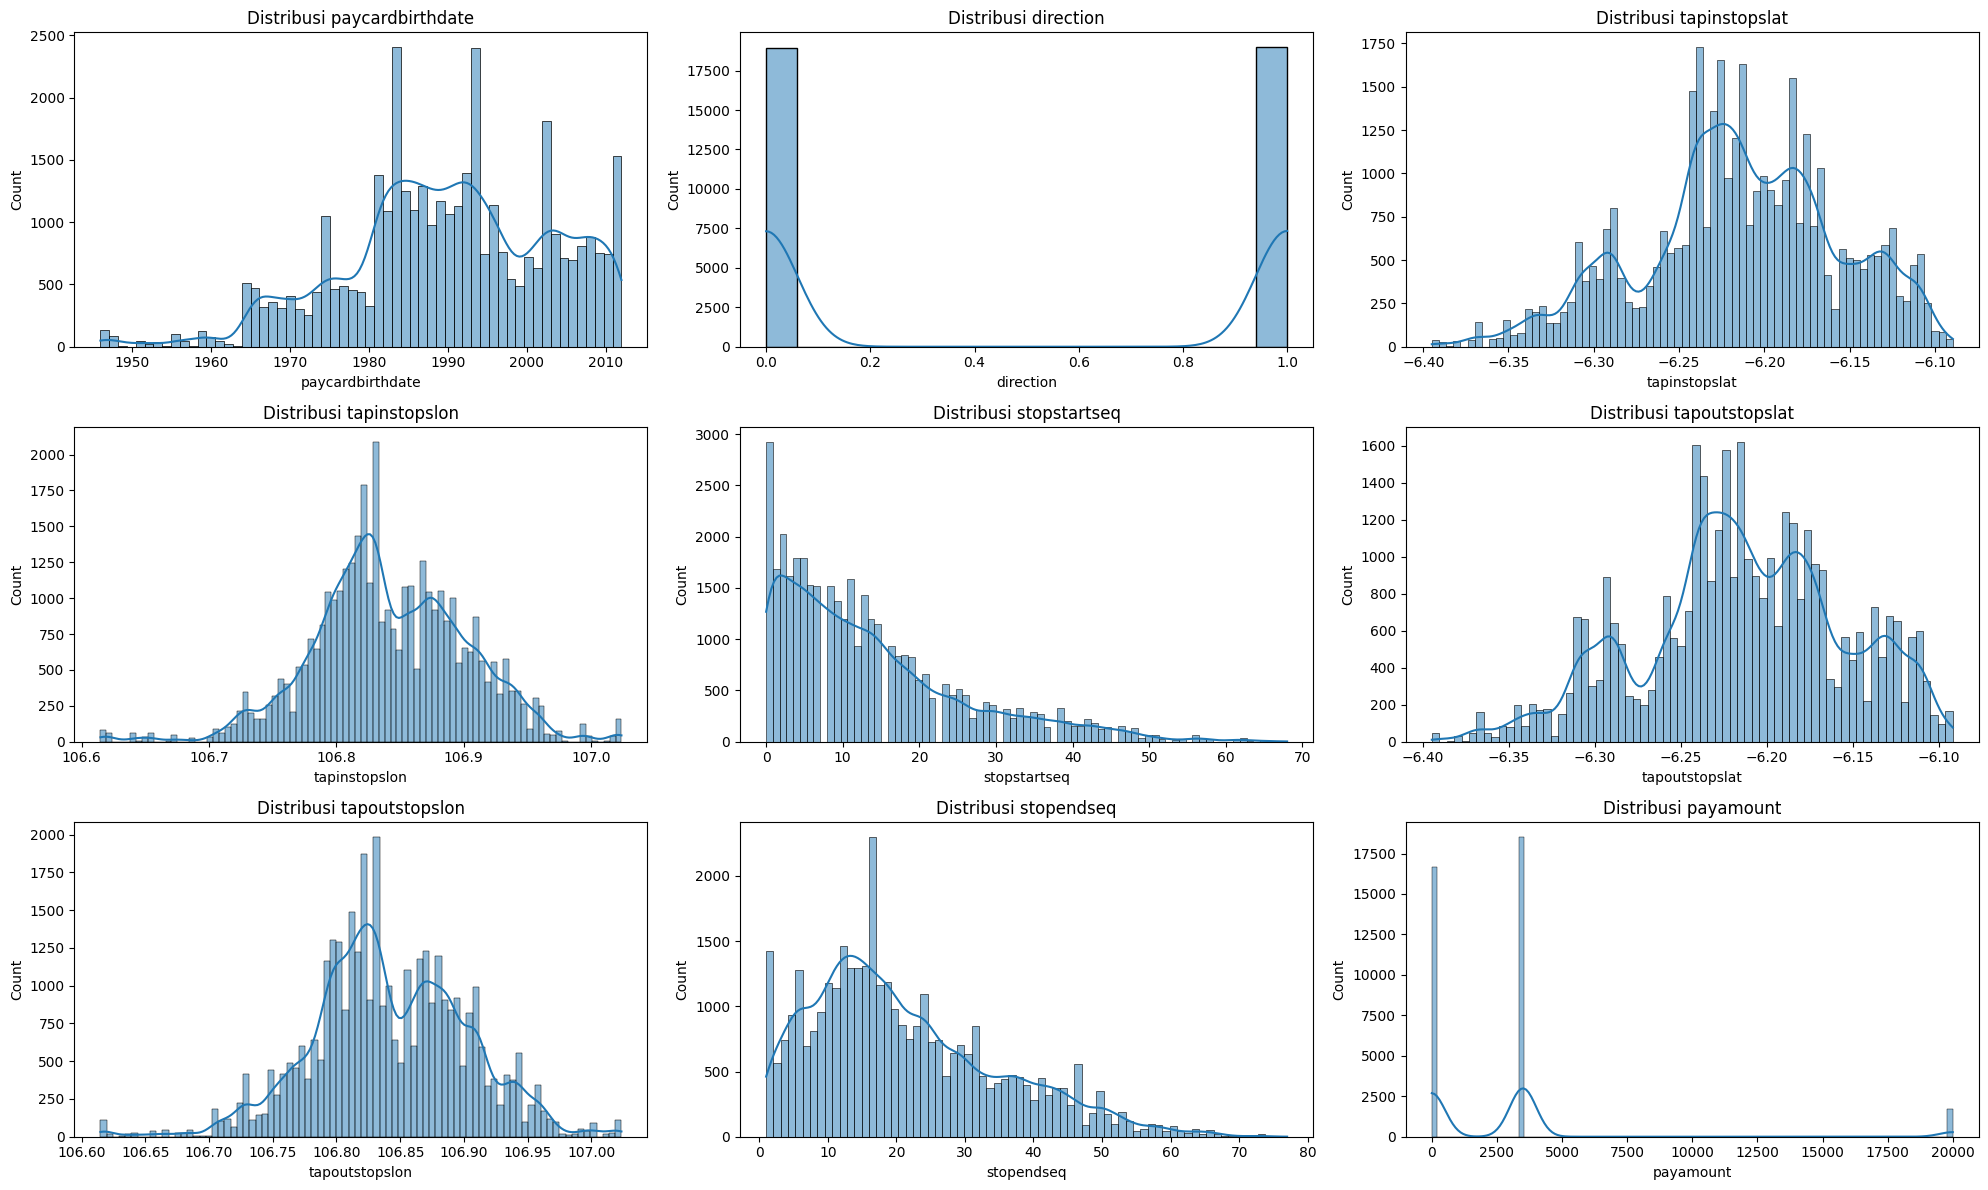

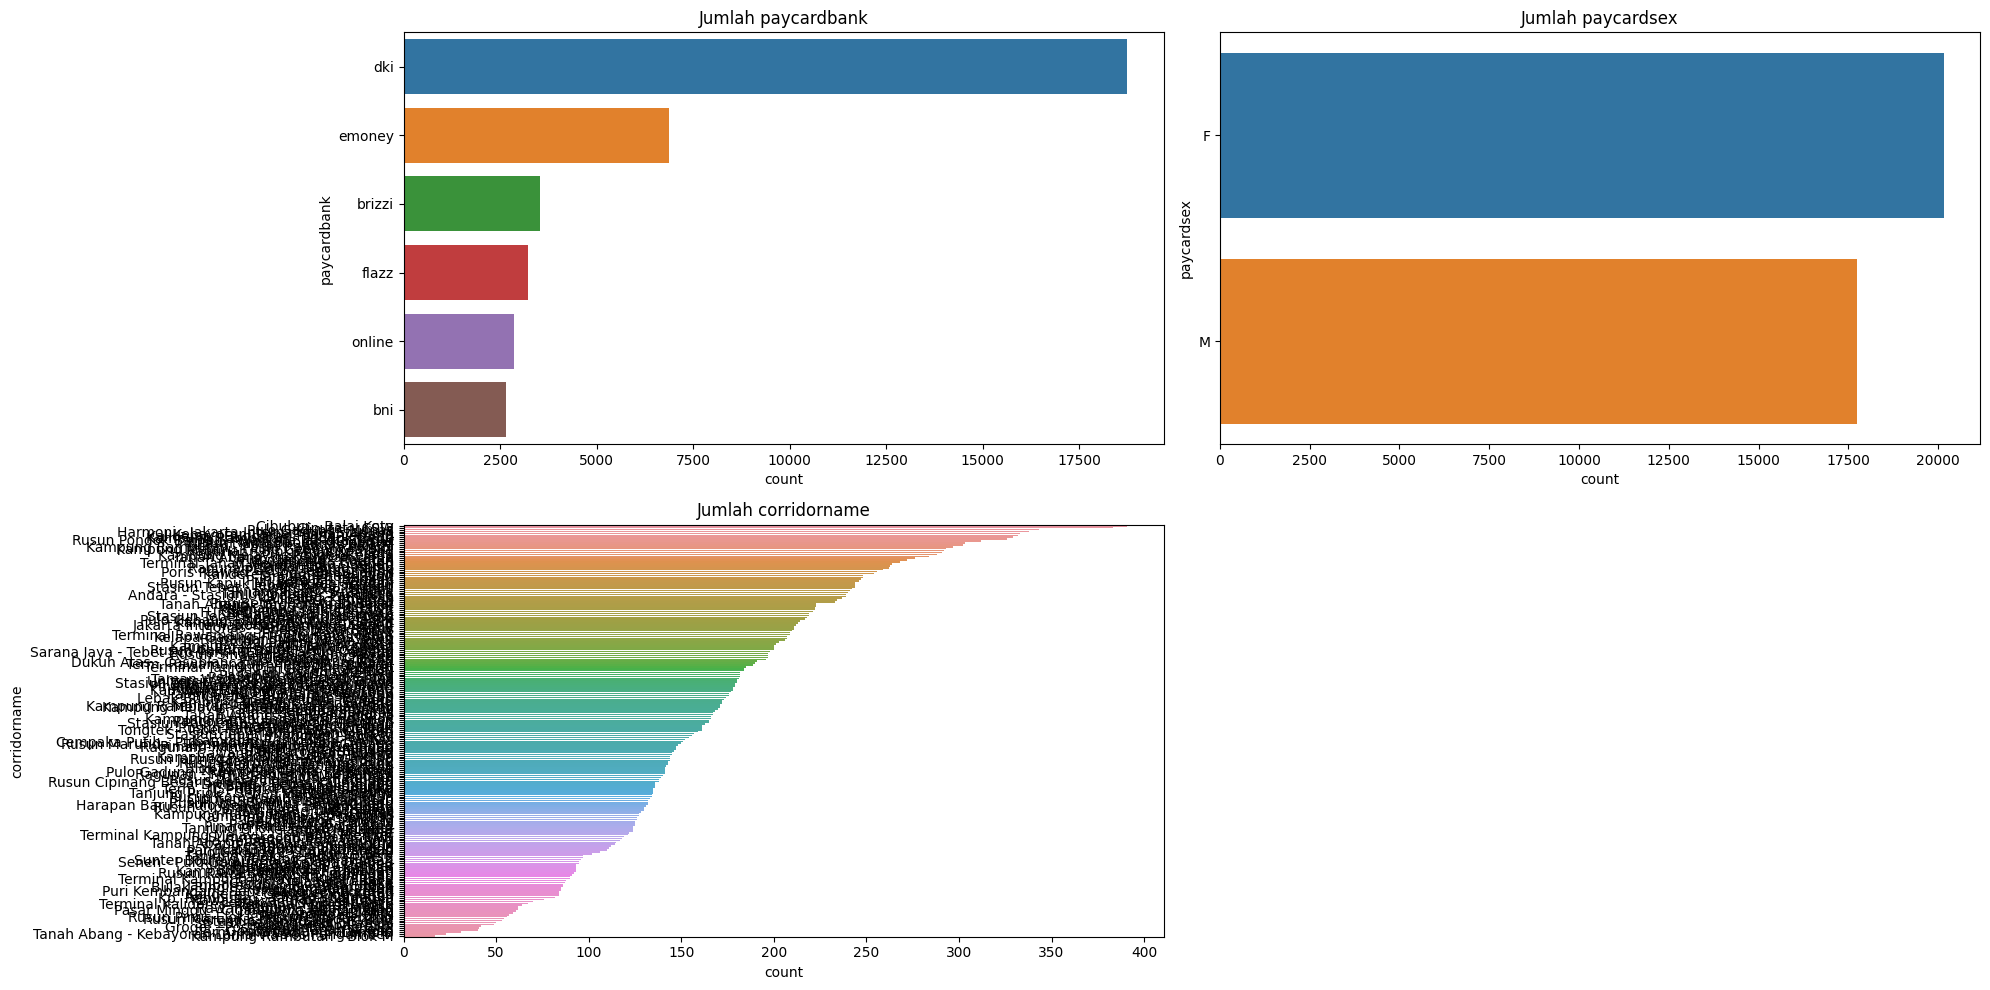

In [14]:
# --- KODE 1 ---

numeric_cols = ['paycardbirthdate', 'direction', 'tapinstopslat', 'tapinstopslon', 
                'stopstartseq', 'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'payamount']

categorical_cols = ['paycardbank', 'paycardsex', 'corridorname']

plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dfJEP[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=dfJEP[col], order = dfJEP[col].value_counts().index)
    plt.title(f'Jumlah {col}')
plt.tight_layout()
plt.show()


### **Insight 1:**

Dengan memperhatikan latar belakang dan pernyataan masalah yang sudah dirumuskan diatas, berikut adalah insight yang dapat disampaikan oleh saya sebagai seorang data analyst berdasarkan visualisasi distribusi:

1. **Dari segi: Pola Pergerakan Penumpang di Berbagai Rute**
- Distribusi usia penumpang (paycardbirthdate) menunjukkan bahwa sebagian besar penumpang adalah generasi muda dan dewasa muda, yang kemungkinan memiliki kebutuhan berbeda dalam hal waktu perjalanan dan fasilitas. Penyesuaian rute atau layanan mungkin diperlukan untuk menyesuaikan dengan kebutuhan demografis ini.
- Dua puncak yang jelas pada distribusi arah (direction) menandakan adanya dua arah perjalanan yang dominan, yang bisa diinterpretasikan sebagai perjalanan 'pergi' dan 'pulang'. Hal ini dapat membantu dalam mengatur jadwal yang lebih efisien untuk mengakomodasi aliran penumpang pada jam-jam sibuk.

2. **Dari segi: Kepadatan Penumpang di Rute Tertentu**
- Dari distribusi lokasi tap-in (tapinstopslat dan tapinstopslon) serta tap-out (tapoutstopslat dan tapoutstopslon), terlihat bahwa ada beberapa titik dengan kepadatan yang lebih tinggi. Ini dapat menandakan area-area yang perlu diperhatikan untuk peningkatan kapasitas atau frekuensi layanan.
- Sekuen pemberhentian (stopstartseq dan stopendseq) dengan jumlah penumpang yang lebih tinggi menunjukkan potensi rute-rute yang padat yang mungkin memerlukan penambahan layanan atau penyesuaian jadwal untuk mengurangi kepadatan dan waktu tunggu.

### **Insight 2:**

1. **Pola Pembayaran (Jumlah paycardbank):**

- Terdapat dominasi penggunaan kartu pembayaran dari bank tertentu, dengan 'dki' sebagai metode pembayaran yang paling sering digunakan. Ini menunjukkan bahwa kerjasama dengan bank 'dki' mungkin bisa diperkuat atau dimanfaatkan lebih lanjut dalam program-program loyalitas atau promosi.
- Metode pembayaran elektronik seperti 'emoney' juga cukup populer, menandakan pentingnya sistem pembayaran yang mudah dan cepat dalam operasional layanan transportasi.

2. **Demografi Penumpang (Jumlah paycardsex):**

- Terdapat jumlah penumpang perempuan yang lebih tinggi dibandingkan laki-laki, menunjukkan bahwa layanan mungkin harus disesuaikan untuk memenuhi kebutuhan dan keselamatan penumpang perempuan lebih lanjut, seperti penyediaan gerbong atau kursi khusus.

3. **Kepadatan Rute (Jumlah corridorname):**

Dari distribusi jumlah transaksi per koridor, beberapa koridor tampak sangat padat dibandingkan lainnya. Pemahaman ini penting untuk menentukan di mana TransJakarta mungkin perlu meningkatkan frekuensi layanan atau kapasitas untuk mengurangi kepadatan dan meningkatkan pengalaman penumpang.

Berdasarkan analisis data ini, Divisi Manajemen Operasional dapat mengambil beberapa langkah strategis, seperti:

- Mengevaluasi dan meningkatkan kerjasama dengan penyedia layanan pembayaran yang paling sering digunakan.
- Mengimplementasikan strategi pemasaran dan promosi yang ditargetkan berdasarkan demografi penumpang.
- Menyesuaikan jadwal dan rute berdasarkan data kepadatan untuk meningkatkan efisiensi dan kepuasan pelanggan.
- Menyelidiki lebih lanjut mengenai koridor yang padat dan mempertimbangkan redistribusi atau penambahan armada di jam-jam sibuk atau di stasiun-stasiun dengan volume penumpang tinggi.

Insight-insight ini akan membantu Divisi Manajemen Operasional dalam membuat keputusan yang informasi untuk memperbaiki dan meningkatkan layanan yang ditawarkan kepada penumpang TransJakarta.


In [15]:
# Memeriksa missing values
missing_values = dfJEP.isnull().sum()
missing_percentage = (dfJEP.isnull().sum() / len(dfJEP)) * 100

missing_info = pd.DataFrame({'Jumlah Missing Values': missing_values, 'Persentase (%)': missing_percentage})
missing_info[missing_info['Jumlah Missing Values'] > 0]  # Menampilkan hanya kolom yang memiliki missing values

,Jumlah Missing Values,Persentase (%)
corridorid,1257,3.316623
corridorname,1930,5.092348
tapinstops,1213,3.200528
tapoutstops,2289,6.039578
tapoutstopsname,1344,3.546174
tapoutstopslat,1344,3.546174
tapoutstopslon,1344,3.546174
stopendseq,1344,3.546174
tapouttime,1344,3.546174
payamount,1007,2.656992


<Axes: >

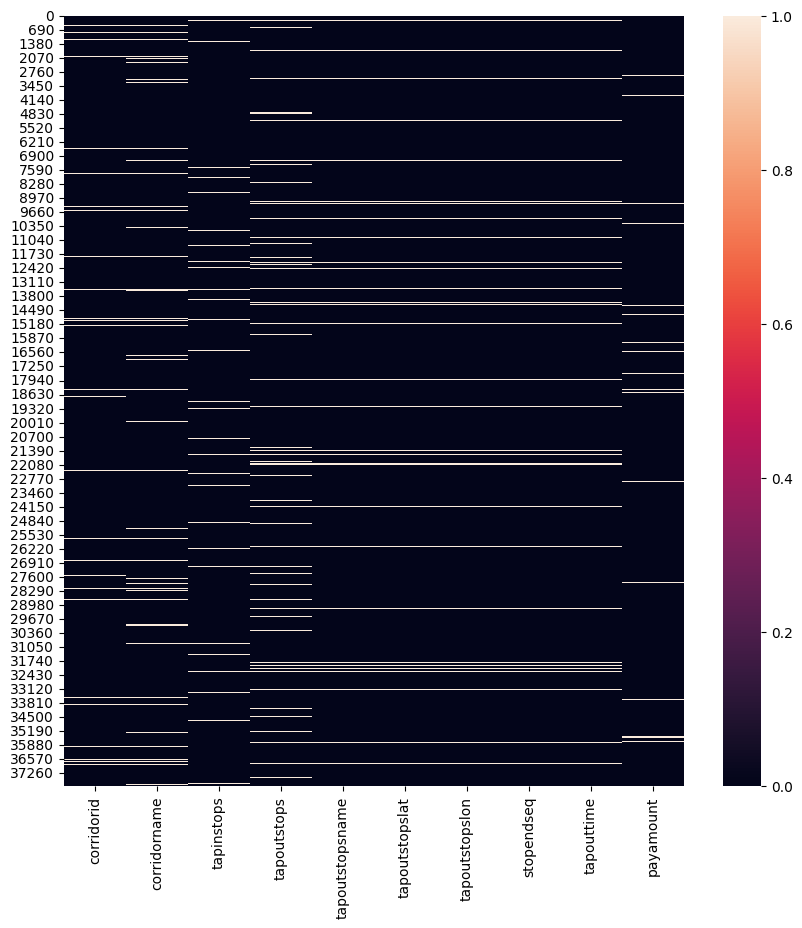

In [16]:
# Sebaran missing value di dalam data menggunakan Heatmap:

plt.figure(figsize=(10,10))
sns.heatmap(dfJEP[['corridorid',
                'corridorname',
                'tapinstops',
                'tapoutstops',
                'tapoutstopsname',
                'tapoutstopslat',
                'tapoutstopslon',
                'stopendseq',
                'tapouttime',
                'payamount']].isna())

### **Insight & Interpretasi:**

- dari heatmap, kita dapat melihat bahwa terdapat beberapa kolom dengan missing values yang signifikan. Heatmap menunjukkan distribusi missing values secara visual dan memudahkan untuk mengidentifikasi pola tertentu dalam data yang hilang. Kolom `corridorname`, `tapoutstops`, `tapoutstopsname`, `tapoutstopslat`, `tapoutstopslon`, `stopendseq`, dan `tapouttime` tampak memiliki jumlah missing values yang hampir serupa, yang mungkin mengindikasikan ada hubungan antara kolom-kolom tersebut.
- tabel memberikan informasi yang lebih rinci tentang jumlah dan persentase missing values. Kolom seperti `corridorid`, `corridorname`, dan `tapoutstops` memiliki persentase missing values yang lebih tinggi dibandingkan kolom lain seperti `payamount`

> ### KORELASI MATRIKS ANTAR MISSING VALUES

In [17]:
numerical_columns = dfJEP.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = dfJEP.select_dtypes(include=['object']).columns.tolist()

identified_columns = {
    "Kolom Numerik": numerical_columns,
    "Kolom Kategorikal": categorical_columns
}

identified_columns

{'Kolom Numerik': ['paycardid',
  'paycardbirthdate',
  'direction',
  'tapinstopslat',
  'tapinstopslon',
  'stopstartseq',
  'tapoutstopslat',
  'tapoutstopslon',
  'stopendseq',
  'payamount'],
 'Kolom Kategorikal': ['transid',
  'paycardbank',
  'paycardname',
  'paycardsex',
  'corridorid',
  'corridorname',
  'tapinstops',
  'tapinstopsname',
  'tapintime',
  'tapoutstops',
  'tapoutstopsname',
  'tapouttime']}

In [18]:
# --- KODE 2
correlation_matrix_full = dfJEP.select_dtypes(include=['int64', 'float64']).corr()
correlation_matrix_full

,paycardid,paycardbirthdate,direction,tapinstopslat,tapinstopslon,stopstartseq,tapoutstopslat,tapoutstopslon,stopendseq,payamount
paycardid,1.000000,0.000939,0.000839,-0.014416,-0.035232,-0.027670,-0.007771,-0.032021,-0.045616,0.061040
paycardbirthdate,0.000939,1.000000,0.001615,0.061717,-0.033932,-0.025739,0.039884,-0.033193,-0.028652,0.066837
direction,0.000839,0.001615,1.000000,0.002996,-0.007578,-0.051265,-0.058007,0.045972,-0.044204,0.001040
tapinstopslat,-0.014416,0.061717,0.002996,1.000000,0.026214,-0.001103,0.899224,0.033296,-0.012108,-0.124661
tapinstopslon,-0.035232,-0.033932,-0.007578,0.026214,1.000000,0.043186,0.035634,0.892529,0.080392,-0.190337
stopstartseq,-0.027670,-0.025739,-0.051265,-0.001103,0.043186,1.000000,-0.017807,0.037464,0.825642,-0.250072
tapoutstopslat,-0.007771,0.039884,-0.058007,0.899224,0.035634,-0.017807,1.000000,0.016244,-0.025369,-0.141596
tapoutstopslon,-0.032021,-0.033193,0.045972,0.033296,0.892529,0.037464,0.016244,1.000000,0.073888,-0.191884
stopendseq,-0.045616,-0.028652,-0.044204,-0.012108,0.080392,0.825642,-0.025369,0.073888,1.000000,-0.323909
payamount,0.061040,0.066837,0.001040,-0.124661,-0.190337,-0.250072,-0.141596,-0.191884,-0.323909,1.000000


### **Insight:** 

Matriks korelasi untuk dataset Transjakarta telah dihitung untuk semua kolom numerik. Berikut adalah beberapa insight dari matriks korelasi yang dihasilkan:

- Kolom 'tapinstopslat' dan 'tapoutstopslat' memiliki korelasi yang sangat tinggi (0.899224), menunjukkan bahwa lokasi geografis untuk pemberhentian naik dan turun penumpang berkaitan erat.

- Demikian pula, 'tapinstopslon' dan 'tapoutstopslon' juga memiliki korelasi yang tinggi (0.892529), yang menandakan bahwa posisi longitude dari pemberhentian naik dan turun cenderung berdekatan.

- Kolom 'stopstartseq' dan 'stopendseq' memiliki korelasi yang sangat kuat (0.825642), mengindikasikan bahwa urutan pemberhentian awal dan akhir biasanya berurutan atau dekat dalam rute.

- Ada hubungan negatif moderat antara 'stopendSeq' dan 'payamount' (-0.323909), yang dapat menyarankan bahwa semakin jauh urutan pemberhentian akhir, mungkin tarif yang dibayar cenderung lebih rendah, atau mungkin ada penyesuaian tarif berdasarkan jarak perjalanan.

- 'paycardbirthdate' memiliki korelasi positif kecil dengan 'payamount' (0.066837), menandakan bahwa mungkin ada sedikit kecenderungan bahwa penumpang yang lebih muda cenderung membayar lebih, namun korelasi ini lemah dan mungkin tidak signifikan.

- Kolom yang berkaitan dengan ID pembayaran ('paycardid') tidak menunjukkan korelasi yang signifikan dengan kolom lainnya, yang masuk akal karena ini adalah pengenal unik yang tidak seharusnya berkorelasi dengan aspek operasional transportasi.


### **Handling Missing Values**

Untuk menangani missing values pada dataset, kita perlu mempertimbangkan beberapa hal:

1. **Presentase Missing Values:** Jika presentase missing values tinggi, menghapus baris mungkin akan mengurangi jumlah data yang signifikan, yang bisa mempengaruhi analisis. Jika presentase rendah, menghapus baris mungkin merupakan pilihan yang baik.

2. **Hubungan antar Kolom Missing Values:** Jika kolom memiliki missing values yang berkorelasi, seperti tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime, kita mungkin harus mengisi atau menghapus baris-baris tersebut secara bersamaan untuk menjaga konsistensi data.

3. **Isi Sample Data:** Periksa isi data untuk memahami konteks dan memutuskan metode pengisian yang paling sesuai (rata-rata, median, modus, atau nilai tetap seperti 'Unknown'/'Tidak Diketahui').

In [19]:
missing_values_bool = dfJEP.isnull()
missing_values_corr = missing_values_bool.corr()
missing_values_corr

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
transid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paycardid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paycardbank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paycardname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paycardsex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paycardbirthdate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
corridorid,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.711112,NaN,-0.001867,...,NaN,NaN,NaN,0.006236,0.005915,0.005915,0.005915,0.005915,0.005915,-0.002197
corridorname,NaN,NaN,NaN,NaN,NaN,NaN,0.711112,1.000000,NaN,0.000157,...,NaN,NaN,NaN,0.003746,0.004905,0.004905,0.004905,0.004905,0.004905,-0.001701
direction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tapinstops,NaN,NaN,NaN,NaN,NaN,NaN,-0.001867,0.000157,NaN,1.000000,...,NaN,NaN,NaN,-0.007086,-0.005686,-0.005686,-0.005686,-0.005686,-0.005686,0.000718


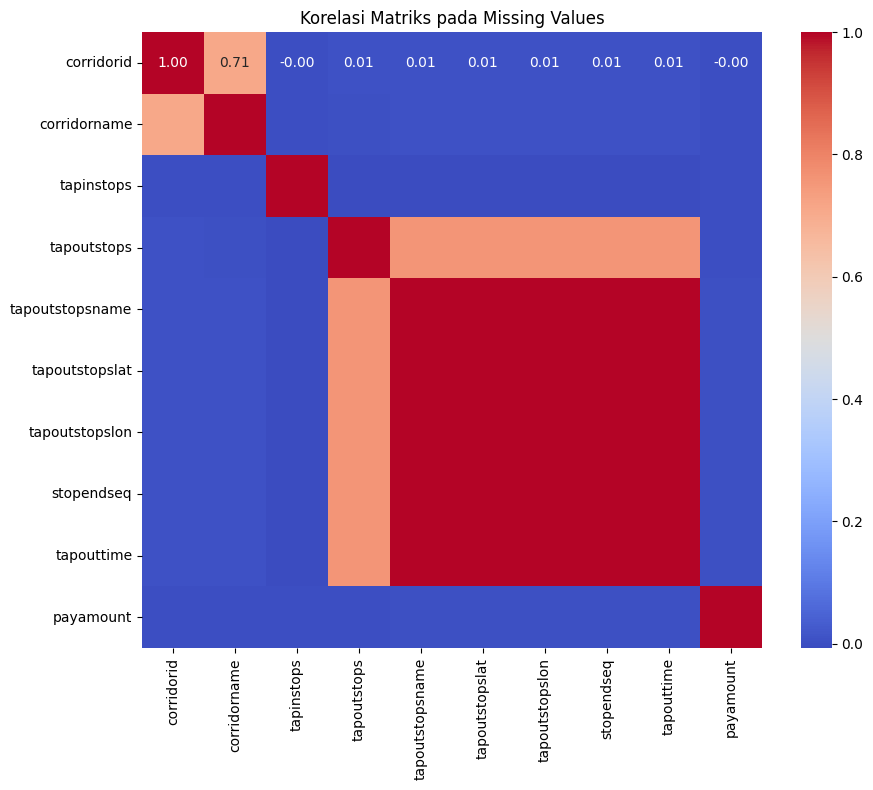

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values_bool = dfJEP.isnull()
missing_values_corr = missing_values_bool.corr()
numerical_columns_with_missing = dfJEP.columns[dfJEP.isnull().any()].tolist()
missing_values_corr_filtered = missing_values_corr.loc[numerical_columns_with_missing, numerical_columns_with_missing]
plt.figure(figsize=(10, 8))
sns.heatmap(missing_values_corr_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Matriks pada Missing Values')
plt.show()


### **Insight:**

Dari heatmap, kita dapat melihat:

- ada korelasi yang signifikan antara `tapoutstops`, `tapoutstopsname`, `tapoutstopslat`, `tapoutstopslon`, `stopendseq`, dan `tapouttime`, yang semuanya berkorelasi sangat kuat satu sama lain dengan nilai mendekati atau sama dengan 1. Ini menandakan bahwa keberadaan missing values di salah satu dari kolom-kolom ini kemungkinan besar diikuti dengan missing values pada kolom-kolom lainnya dalam kelompok ini.

- korelasi antara kolom-kolom ini dengan `corridorid`, `corridorname`, dan `tapinstops` lebih rendah, yang menunjukkan bahwa missing values di kolom-kolom tersebut lebih independen dan tidak terjadi bersamaan dengan kelompok kolom yang pertama.

- `payamount` tidak memiliki korelasi dengan missing values di kolom lain, yang menunjukkan bahwa missing values pada kolom ini terjadi secara acak dan independen dari kolom lainnya.

In [21]:
# Untuk data kategorikal, kita akan menggunakan modus
# Untuk data numerik, kita akan menggunakan median jika distribusinya miring

# Kolom Kategorikal yang Missing Values
categorical_cols_with_missing = ['corridorid', 'corridorname', 'tapinstops', 'tapoutstops', 
                                'tapoutstopsname', 'tapouttime']

# Kolom Numerik yang Missing Values
numerical_cols_with_missing = ['tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'payamount']

# Fungsi untuk memperhitungkan nilai yang hilang dengan mode untuk kolom kategorikal
def impute_mode(data, column):
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True)

# Fungsi untuk memperhitungkan nilai yang hilang dengan median untuk kolom numerik
def impute_median(data, column):
    median = data[column].median()
    data[column].fillna(median, inplace=True)

# Mengimputasi nilai yang hilang untuk kolom kategorikal
for col in categorical_cols_with_missing:
    impute_mode(dfJEP, col)

# Mengimputasi nilai yang hilang untuk kolom numerik
for col in numerical_cols_with_missing:
    impute_median(dfJEP, col)

# Periksa apakah ada nilai yang hilang
dfJEP.isnull().sum()


transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
dtype: int64

In [22]:
dfJEP.to_csv('Transjakarta(2).csv', index=True)

---

In [23]:
dfJEPNew = pd.read_csv('Transjakarta(2).csv')

In [24]:
dfJEPNew.isna().sum()

Unnamed: 0          0
transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
dtype: int64

In [25]:
dfJEPNew.dtypes

Unnamed: 0            int64
transid              object
paycardid             int64
paycardbank          object
paycardname          object
paycardsex           object
paycardbirthdate      int64
corridorid           object
corridorname         object
direction           float64
tapinstops           object
tapinstopsname       object
tapinstopslat       float64
tapinstopslon       float64
stopstartseq          int64
tapintime            object
tapoutstops          object
tapoutstopsname      object
tapoutstopslat      float64
tapoutstopslon      float64
stopendseq          float64
tapouttime           object
payamount           float64
dtype: object

In [26]:
display(dfJEPNew.head(), dfJEPNew.tail())

,Unnamed: 0,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,Unnamed: 0,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
37895,37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [27]:
dfJEPNew.columns

Index(['Unnamed: 0', 'transid', 'paycardid', 'paycardbank', 'paycardname',
       'paycardsex', 'paycardbirthdate', 'corridorid', 'corridorname',
       'direction', 'tapinstops', 'tapinstopsname', 'tapinstopslat',
       'tapinstopslon', 'stopstartseq', 'tapintime', 'tapoutstops',
       'tapoutstopsname', 'tapoutstopslat', 'tapoutstopslon', 'stopendseq',
       'tapouttime', 'payamount'],
      dtype='object')

In [28]:
dfJEPNew2 = dfJEPNew.drop('Unnamed: 0', axis=1)
dfJEPNew2

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [29]:
dfJEPNew2.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount'],
      dtype='object')

In [30]:
dfJEPNew2.to_csv('TransjakartaNew2.csv', index=False)

In [31]:
dfJEP19 = pd.read_csv('TransjakartaNew2.csv')
dfJEP19

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [32]:
dfJEP19.isna().sum()

transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
dtype: int64

> ### **Tahapan: Cek Konsistensi Tipe Data & Ubah Tipe Data yang Inkonsistensi (Disesuaikan dengan Sample Data)**

In [33]:
dfJEP19.dtypes

transid              object
paycardid             int64
paycardbank          object
paycardname          object
paycardsex           object
paycardbirthdate      int64
corridorid           object
corridorname         object
direction           float64
tapinstops           object
tapinstopsname       object
tapinstopslat       float64
tapinstopslon       float64
stopstartseq          int64
tapintime            object
tapoutstops          object
tapoutstopsname      object
tapoutstopslat      float64
tapoutstopslon      float64
stopendseq          float64
tapouttime           object
payamount           float64
dtype: object

**Pemisahan Kolom `tapintime` dan `tapouttime`dengan membuat kolom baru.**

In [34]:
# dfJEP19['tapintimedate'] = pd.to_datetime(dfJEP19['tapintime']).dt.date
# dfJEP19['tapintimenew'] = pd.to_datetime(dfJEP19['tapintime']).dt.time
# dfJEP19['tapouttimedate'] = pd.to_datetime(dfJEP19['tapouttime']).dt.date
# dfJEP19['tapouttimenew'] = pd.to_datetime(dfJEP19['tapouttime']).dt.time

# dfJEP19[['tapintime', 'tapintimedate', 'tapintimenew', 'tapouttime', 'tapouttimedate', 'tapouttimenew']].head()

In [35]:
dfJEP19

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [36]:
dfJEP19.isna().sum()

transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
dtype: int64

In [37]:
# dfJEPNew2 = dfJEP19.drop(['tapintime','tapouttime'], axis=1)
# dfJEPNew2

In [38]:
dfJEPNew2.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount'],
      dtype='object')

In [39]:
dfJEPNew2.to_csv('TransjakartaNew.csv', index=False)

In [40]:
dfJEP = pd.read_csv('TransjakartaNew.csv')
dfJEP

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [41]:
data_types_new = dfJEP.dtypes

In [42]:
data_type_report_new = pd.DataFrame({
    "Column": data_types_new.index,
    "Data Type": data_types_new.values,
    "Sample Data": dfJEP.iloc[0]
})

data_type_report_new

,Column,Data Type,Sample Data
transid,transid,object,EIIW227B8L34VB
paycardid,paycardid,int64,180062659848800
paycardbank,paycardbank,object,emoney
paycardname,paycardname,object,Bajragin Usada
paycardsex,paycardsex,object,M
paycardbirthdate,paycardbirthdate,int64,2008
corridorid,corridorid,object,5
corridorname,corridorname,object,Matraman Baru - Ancol
direction,direction,float64,1.0
tapinstops,tapinstops,object,P00142


In [43]:
# dfJEP['direction'] = dfJEP['direction'].astype('int64')
# dfJEP['stopendseq'] = dfJEP['stopendseq'].astype('int64')
# dfJEP['payamount'] = dfJEP['payamount'].astype('int64')
# datetime_columns = ['tapintimedate', 'tapouttimedate']
# for col in datetime_columns:
#     dfJEP[col] = pd.to_datetime(dfJEP[col])

# # datetime_columns = ['tapintimedate', 'tapintimenew', 'tapouttimedate', 'tapouttimenew']
# # for col in datetime_columns:
# #     dfJEP[col] = pd.to_datetime(dfJEP[col])

# dfJEP.dtypes

In [44]:
dfJEP.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapinstopslon,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


**Interpretasi & Justifikasi:**

- pada tahapan mengubah tipe data `direction` dari float menjadi int: justifikasinya karena nilai dalam kolom direction seharusnya merupakan bilangan bulat karena nilainya mempresentasikan sebagai arah perjalanan dimana 0 arah pergi dan 1 arah pulang.
- pada tahapan mengubah tipe data `payamount` dari float menjadi int: justifikasinya karena nilai dalam kolom payamount seharusnya merupakan bilangan bulat karena nilai nya mempresentasikan sebagai nominal biaya pembayaran transjakarta yang nilai payamount itu adalah 3500, 20000, dan 0.
- pada tahapan mengubah tipe data `stopendseq` dari float menjadi int: justifikasinya karena nilai didalam kolom merepresentasikan nilai urutan yang tidak perlu memiliki nilai desimal, mengubahnya menjadi int merupakan hal yang tepat untuk membuat data lebih mudah dibaca dan diproses, serta menghemat memori.

In [45]:
dataTypeReportNew = pd.DataFrame({
    "Column": data_types_new.index,
    "Data Type": data_types_new.values,
    "Sample Data": dfJEP.iloc[0]
})

dataTypeReportNew

,Column,Data Type,Sample Data
transid,transid,object,EIIW227B8L34VB
paycardid,paycardid,int64,180062659848800
paycardbank,paycardbank,object,emoney
paycardname,paycardname,object,Bajragin Usada
paycardsex,paycardsex,object,M
paycardbirthdate,paycardbirthdate,int64,2008
corridorid,corridorid,object,5
corridorname,corridorname,object,Matraman Baru - Ancol
direction,direction,float64,1.0
tapinstops,tapinstops,object,P00142


---

> ### **Tahapan: Cek Duplikat Pada Dataset**

In [46]:
duplicate_rows = dfJEP[dfJEP.duplicated()]
duplicate_count = duplicate_rows.shape[0]
duplicate_count

0

### **Interprestasi:**

Dari analisa diatas, tidak ada duplikat baris pada dataset

In [47]:
duplicate_counts_per_column = dfJEP.apply(lambda x: x.duplicated().sum())
insights = {}
for column, duplicates in duplicate_counts_per_column.items():
    total_values = dfJEP[column].count()
    unique_values = dfJEP[column].nunique()
    percentage = (duplicates / total_values) * 100 if total_values > 0 else 0

    insights[column] = {
        "total_values": total_values,
        "unique_values": unique_values,
        "duplicate_values": duplicates,
        "percentage_duplicates": percentage
    }

insights

{'transid': {'total_values': 37900,
  'unique_values': 37900,
  'duplicate_values': 0,
  'percentage_duplicates': 0.0},
 'paycardid': {'total_values': 37900,
  'unique_values': 2000,
  'duplicate_values': 35900,
  'percentage_duplicates': 94.72295514511873},
 'paycardbank': {'total_values': 37900,
  'unique_values': 6,
  'duplicate_values': 37894,
  'percentage_duplicates': 99.98416886543535},
 'paycardname': {'total_values': 37900,
  'unique_values': 1993,
  'duplicate_values': 35907,
  'percentage_duplicates': 94.74142480211081},
 'paycardsex': {'total_values': 37900,
  'unique_values': 2,
  'duplicate_values': 37898,
  'percentage_duplicates': 99.99472295514512},
 'paycardbirthdate': {'total_values': 37900,
  'unique_values': 67,
  'duplicate_values': 37833,
  'percentage_duplicates': 99.82321899736148},
 'corridorid': {'total_values': 37900,
  'unique_values': 221,
  'duplicate_values': 37679,
  'percentage_duplicates': 99.41688654353563},
 'corridorname': {'total_values': 37900,
 

### **Interprestasi:**

Dari analisis diatas, kita bisa melihat bahwa tingginya jumlah duplikat pada beberapa kolom adalah karakteristik normal dari data transaksi transportasi. Kolom dengan identifikasi unik seperti transid tidak memiliki duplikat, yang menunjukkan integritas data yang baik. Kolom dengan data kategorikal atau terbatas seperti paycardsex, direction, dan payamount memiliki banyak duplikat, yang logis mengingat sifat data tersebut. Waktu tap-in dan tap-out menunjukkan variasi yang lebih tinggi, sesuai dengan perilaku penumpang yang berbeda-beda. Duplikasi pada data seperti paycardid dan halte menunjukkan pola penggunaan yang berulang

---

> ### **Tahapan: Cek Data Formatting**

In [48]:
import re

def clean_corridorid(corridor_id):
    return re.sub(r'\W+', '', corridor_id).upper()


dfJEP['corridorid'] = dfJEP['corridorid'].apply(clean_corridorid)
dfJEP['corridorid'].head()

0      5
1     6C
2    R1A
3    11D
4     12
Name: corridorid, dtype: object

In [49]:
dfJEP['corridorid'].value_counts()

corridorid
1T       1657
S21       388
JIS3      341
8C        339
JAK06     333
         ... 
1R         41
JAK99      31
JAK12      24
7B         16
M5         15
Name: count, Length: 221, dtype: int64

### **Justifikasi:**

- Melakukan tahapan perubahan format penulisan pada kolom corridorid dengan menghapus tanda baca dengan format penulisan: kombinasi huruf angka dengan huruf besar, tanpa spasi dan tanda baca.

In [50]:
def check_data_formatting(df):
    formatting_issues = {
        # 'null_values': df.isnull().sum(),
        'unique_values': df.nunique(),
        # 'sample_entries': df.sample(5, random_state=1)
    }
    return formatting_issues

# Check the formatting issues for the entire DataFrame
formatting_issues = check_data_formatting(dfJEP)
formatting_issues

{'unique_values': transid             37900
 paycardid            2000
 paycardbank             6
 paycardname          1993
 paycardsex              2
 paycardbirthdate       67
 corridorid            221
 corridorname          216
 direction               2
 tapinstops           2570
 tapinstopsname       2602
 tapinstopslat        2587
 tapinstopslon        2458
 stopstartseq           67
 tapintime           37079
 tapoutstops          2230
 tapoutstopsname      2248
 tapoutstopslat       2237
 tapoutstopslon       2139
 stopendseq             74
 tapouttime          35908
 payamount               3
 dtype: int64}

In [51]:
dfJEP.dtypes

transid              object
paycardid             int64
paycardbank          object
paycardname          object
paycardsex           object
paycardbirthdate      int64
corridorid           object
corridorname         object
direction           float64
tapinstops           object
tapinstopsname       object
tapinstopslat       float64
tapinstopslon       float64
stopstartseq          int64
tapintime            object
tapoutstops          object
tapoutstopsname      object
tapoutstopslat      float64
tapoutstopslon      float64
stopendseq          float64
tapouttime           object
payamount           float64
dtype: object

In [52]:
current_year = 2023
dfJEP['age'] = current_year - dfJEP['paycardbirthdate']
dfJEP[['paycardbirthdate', 'age']].head()

,paycardbirthdate,age
0,2008,15
1,1997,26
2,1992,31
3,1978,45
4,1982,41


In [53]:
dfJEP.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41


In [54]:
dfJEP['paycardid'] = dfJEP['paycardid'].astype(object)
dfJEP['paycardid'].dtype

dtype('O')

In [55]:
dfJEP.dtypes

transid              object
paycardid            object
paycardbank          object
paycardname          object
paycardsex           object
paycardbirthdate      int64
corridorid           object
corridorname         object
direction           float64
tapinstops           object
tapinstopsname       object
tapinstopslat       float64
tapinstopslon       float64
stopstartseq          int64
tapintime            object
tapoutstops          object
tapoutstopsname      object
tapoutstopslat      float64
tapoutstopslon      float64
stopendseq          float64
tapouttime           object
payamount           float64
age                   int64
dtype: object

In [56]:
# Data type of 'direction'
direction_dtype = dfJEP['direction'].dtype

# Unique values and their counts in the 'direction' column
direction_values = dfJEP['direction'].value_counts()

direction_dtype, direction_values.head()

(dtype('float64'),
 direction
 1.0    18974
 0.0    18926
 Name: count, dtype: int64)

**Interprestasi & Justifikasi:**

- pada kolom `paycardbirthdate` tetap mempertahankan tipe data sudah sesuai int karena dari kolom ini akan membuat kolom baru yaitu kolom `age` untuk menghitung umur penumpang.
- pada kolom `paycardid` tipe datanya diubah dari int menjadi object karena sample data pada kolom tersebut tidak perlu dilakukan perhitungan apapun, jadi akan dijadikan string saja. 

In [57]:
import re
def clean_name(name):
    cleaned = re.sub(r'[.,]', '', name) 
    cleaned = re.sub(r'\b\w{1,2}\b', '', cleaned)  
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()  
    parts = cleaned.split()
    if len(parts) >= 2:
        return ' '.join(parts[:2])
    else:
        return cleaned  
    
dfJEP['paycardname'] = dfJEP['paycardname'].apply(clean_name)
dfJEP[['paycardname']].head(100)

,paycardname
0,Bajragin Usada
1,Gandi Widodo
2,Emong Wastuti
3,Surya Wacana
4,Embuh Mardhiyah
...,...
95,Kalim Namaga
96,Vega Rahimah
97,Bajragin Najmudin
98,Ophelia Firmansyah


**Justifikasi & Interprestasi:** 

- pada kolom `paycardname` dilakukan perubahan dengan menggunakan pola regex dimana hanya ingin menampilkan 2 kata yaitu nama depan dan nama belakang dan memformat nama dengan menghapus tanda baca, singkatan dan spasi ekstra serta memastikan bahwa hanya dua kata pertama (asumsi nama depan dan nama belakang) yang disimpan. Tujuannya adalah unutk menciptakan konsistensi dalam penyimpanan nama, dan untuk mencocokan entri dan memelihara integritas data secara umum. 

In [58]:
dfJEP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transid           37900 non-null  object 
 1   paycardid         37900 non-null  object 
 2   paycardbank       37900 non-null  object 
 3   paycardname       37900 non-null  object 
 4   paycardsex        37900 non-null  object 
 5   paycardbirthdate  37900 non-null  int64  
 6   corridorid        37900 non-null  object 
 7   corridorname      37900 non-null  object 
 8   direction         37900 non-null  float64
 9   tapinstops        37900 non-null  object 
 10  tapinstopsname    37900 non-null  object 
 11  tapinstopslat     37900 non-null  float64
 12  tapinstopslon     37900 non-null  float64
 13  stopstartseq      37900 non-null  int64  
 14  tapintime         37900 non-null  object 
 15  tapoutstops       37900 non-null  object 
 16  tapoutstopsname   37900 non-null  object

In [59]:
display(dfJEP.head(10),dfJEP.tail(10))

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,30
6,HEMW326B9N91TV,213155822653833,emoney,Devi Hariyah,M,1974,JAK18,Kalibata - Kuningan,0.0,B00243P,...,25,2023-04-03 06:58:21,P00016,BKN,-6.214718,106.83458,18.0,2023-04-07 19:44:04,0.0,49
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,1T,Cibubur - Balai Kota,1.0,B03416P,...,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,32
8,OIHS248V7S72EB,6510013988638519,dki,Cagak Maheswara,F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0,31
9,ERXO372B2H63RB,3580401035990896,dki,Dadap Pradana,M,2004,1Q,Rempoa - Blok M,0.0,B05781P,...,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0,19


,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount,age
37890,GFLN726N6E23SR,213142775112736,emoney,Nadine Waluyo,F,1997,JAK30,Grogol - Meruya via Roxy,0.0,B00018P,...,32,2023-04-30 14:45:49,B02471P,MNC Studios,-6.190376,106.76625,33.0,2023-04-30 15:09:39,0.0,26
37891,XQDZ821C9G88JD,2712823212983860,dki,drg Maras,F,1966,JAK30,Grogol - Meruya via Roxy,1.0,B01209P,...,14,2023-04-19 16:31:09,B04071P,Sbr. Masjid Nurul Falah Grogol,-6.170757,106.78477,53.0,2023-04-19 19:13:53,0.0,57
37892,YHJT665I6G08OS,4775206940093,online,Cahyo Sudiati,M,1979,JAK52,Terminal Kalideres - Terminal Muara Angke,1.0,B01087P,...,29,2023-04-28 16:38:56,B03207P,RSUD Cengkareng,-6.142238,106.73398,30.0,2023-04-28 18:35:16,0.0,44
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,F,2000,JAK80,Rawa Buaya - Rawa Kompeni,0.0,B02485P,...,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0,23
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,Tgk Dipa,F,2012,JAK39,Kalimalang - Duren Sawit,0.0,B04489P,...,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0,11
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,19
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,49
37897,YXPP627N4G95HO,213159426675861,emoney,drg Zahra,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,47
37899,FMZZ963S4B68ZP,501862539795,flazz,drg Leo,F,1985,13,Ciledug - Tendean,0.0,P00001,...,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0,38


---

### **`Tahapan: Cek Kembali DATASET`**

In [60]:
print(f'Jumlah baris dan kolom di dataset df adalah {dfJEP.shape}')
dfJEP.info()

Jumlah baris dan kolom di dataset df adalah (37900, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transid           37900 non-null  object 
 1   paycardid         37900 non-null  object 
 2   paycardbank       37900 non-null  object 
 3   paycardname       37900 non-null  object 
 4   paycardsex        37900 non-null  object 
 5   paycardbirthdate  37900 non-null  int64  
 6   corridorid        37900 non-null  object 
 7   corridorname      37900 non-null  object 
 8   direction         37900 non-null  float64
 9   tapinstops        37900 non-null  object 
 10  tapinstopsname    37900 non-null  object 
 11  tapinstopslat     37900 non-null  float64
 12  tapinstopslon     37900 non-null  float64
 13  stopstartseq      37900 non-null  int64  
 14  tapintime         37900 non-null  object 
 15  tapoutstops       37900 non-nul

In [61]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in dfJEP.columns :
    listItem.append( [col, dfJEP[col].nunique(), dfJEP[col].unique(), dfJEP[col].isna().sum()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Missing Values'], data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Missing Values
0,transid,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]",0
1,paycardid,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]",0
2,paycardbank,6,"[emoney, dki, flazz, online, brizzi, bni]",0
3,paycardname,1975,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Devi Hariyah, Darmanto Rajasa, Cagak Maheswara, Dadap Pradana, Oskar Widiastuti, Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, Lutfan Nurdiyanti, Sari Nababan, Ophelia Haryanti, Adikara Kurniawan, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana, Tgk Ilsa, Drs Nadia, drg Lukman, Ibrahim Pray

### **TAHAPAN STATISTIK DESKRIPTIF**

In [62]:
display(dfJEP.describe(include=['int64', 'float']), dfJEP.describe(include=['object']))

,paycardbirthdate,direction,tapinstopslat,tapinstopslon,stopstartseq,tapoutstopslat,tapoutstopslon,stopendseq,payamount,age
count,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000
mean,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214654,106.840997,21.105726,2720.976253,32.910686
std,13.051482,0.500006,0.057911,0.060369,12.237623,0.057966,0.059921,13.566851,4157.880625,13.051482
min,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000,11.000000
25%,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.245440,106.801940,11.000000,0.000000,22.000000
50%,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000,33.000000
75%,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.175799,106.882030,29.000000,3500.000000,41.000000
max,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000,77.000000


,transid,paycardid,paycardbank,paycardname,paycardsex,corridorid,corridorname,tapinstops,tapinstopsname,tapintime,tapoutstops,tapoutstopsname,tapouttime
count,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900,37900
unique,37900,2000,6,1975,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,180062659848800,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-07 19:44:04
freq,1,40,18743,84,20157,1657,2321,1449,243,3,2595,1660,1347


### **Insight 1:**

1. **paycardbirtdate & age**
- Rentang umur: tahun lahir berkisar dari 1946-2012, menunjukkan penumpang dari usia 11-77 tahun. ini menunjukkan bahwa layanan transportasi digunakan oleh berbagai kelompok usia.
- Usia rata-rata: usia rata-rata penumpang adalah sekitar 33 tahun, dengan sebagian besar penumpang berada di rentang 22 hingga 41 tahun, ini mungkin mengindikasikan bahwa layanan ini lebih populer di kalangan orang dewasa muda hingga pertengahan.

2. **direction**
- layanan transportasi memiliki dua arah yang ditandai sebagai 0 dan 1, dengan distribusi hampir sama, menunjukkan penggunaan yang seimbang di kedua arah.

3. **koordinat tap in (tapinstopslat & tapinstopslon) dan tap out (tapoutstopslat & tapoutstopslon)**
- lokasi: koordinat latitude dan longitude memiliki rentang yang relatif kecil (sekitar 0.3 derajat) menunjukkan bahwa layanan ini beroperasi dalam area geografis yang terbatas.
- konsentrasi: kedua set koordinat memiliki nilai rata-rata dan median yang sangat dekat, mengindikasikan bahwa sebagian besar aktivitas terkonsentrasi di area tertentu. 

4. **stopstartseq & stopendseq**
- jarak tempuh: urutan pemberhentian awal dan akhir menunjukkan jarak tempuh rata-rata dari sekitar 14 hingga 21 pemberhentian. ada perjalanan yang melibatkan hingga 77 pemberhentian, menunjukkan adanya beberapa rute yang sangat panjang.
- distribusi: lebih banyak perjalan dimulai dan diakhiri di pemberhentian awal (1-29), dengan penurunan jumlah perjalanan yang diakhiri dipemberhentian yang lebih tinggi. 

5. **payamount**
- varian: ada variasi yang signifikan dalam jumlah pembayaran, dengan sebagian besar pembayaran berada di 0 atau 3500, tetapi ada beberapa yang mencapi 20000. Ini mungkin menunjukan adanya berbagai jenis tarif atau beberapa transaksi yang tidak biasa. 
- pembayaran nol (free): sejumlah besar transaksi memiliki nilai pembayaran nol, mungkin menunjukkan perjalanan gratis atau kesalahan pencatatan.

6. **Penyebaran Geografis:**
- koordinat menunjukkan bahwa layanan ini mungkin beroperasi di dalam kota atau wilayah metropolitan, diberikan konsentrasi dan rentang koordinat yang relatif kecil.

7. **Potensi Outlier:**
- Usia maksimal dan minimum/tahun kelahiran penumpang, jumlah pembayaran tertinggi, serta urutan pemberhentian maksimum mungkin menunjukkan adanya outlier atau data yang tidak biasa.

**Kesimpulannya, data ini memberikan wawasan tentang karakteristik pengguna layanan transportasi, termasuk demografi usia, pola perjalanan, dan aspek finansial. Potensi outlier dan rentang data yang luas dalam beberapa variabel menunjukkan perlunya pemeriksaan lebih lanjut untuk memastikan keakuratan dan konsistensi data.**

### **Insight 2:**

1. **Transaksi (transid):**
- Setiap transaksi memiliki ID unik, dengan total 37,900 transaksi yang tercatat.
- Ini menunjukkan bahwa data mencakup 37,900 perjalanan individu tanpa duplikasi.

2. **ID Kartu Pembayaran (paycardid):**
- Ada 2,000 ID kartu pembayaran unik yang digunakan dalam 37,900 transaksi.
- Ini menunjukkan bahwa beberapa kartu digunakan lebih dari sekali. Kartu paling sering digunakan tercatat sebanyak 40 kali.

3. **Bank Kartu Pembayaran (paycardbank):**
- Ada 6 bank yang berbeda terkait dengan kartu pembayaran.
- 'dki' adalah bank yang paling sering muncul, tercatat dalam 18,743 transaksi. Ini menunjukkan dominasi atau popularitasnya.

4. **Nama Pemegang Kartu (paycardname):**
- Terdapat 1,975 nama pemegang kartu unik.
- Nama 'Suci Wacana' adalah yang paling sering tercatat, muncul dalam 84 transaksi.

5. **Jenis Kelamin (paycardsex):**
- Hanya ada dua jenis kelamin yang tercatat: 'F' dan 'M'.
- 'F' (Female) adalah jenis kelamin yang lebih sering muncul dengan 20,157 kali, menunjukkan lebih banyak pengguna perempuan.

6. **ID Koridor (corridorid):**
- Terdapat 221 koridor unik yang digunakan.
- '1T' adalah koridor paling populer, digunakan dalam 1,657 transaksi.

7. **Nama Koridor (corridorname):**
- Ada 216 nama koridor yang berbeda.
- 'Cibubur - Balai Kota' adalah nama koridor yang paling sering muncul, tercatat dalam 2,321 transaksi, menandakan sebagai rute paling populer atau paling sibuk.

8. **Stasiun Masuk (tapinstops) dan Stasiun Keluar (tapoutstops):**
- Terdapat 2,570 stasiun masuk dan 2,230 stasiun keluar yang unik.
- Stasiun 'P00170' adalah stasiun masuk paling populer, sedangkan 'P00016' adalah stasiun keluar paling populer.

9. **Nama Stasiun Masuk (tapinstopsname) dan Keluar (tapoutstopsname):**
- Terdapat 2,602 nama stasiun masuk dan 2,248 nama stasiun keluar yang unik.
- 'Penjaringan' dan 'BKN' masing-masing adalah nama stasiun masuk dan keluar yang paling sering muncul.

10. **Waktu Masuk dan Keluar (tapintimenew, tapouttimenew):**
- Terdapat 24,738 waktu masuk unik dan 25,439 waktu keluar unik.
- aktu masuk paling sering tercatat adalah pukul 06:49:09, dan waktu keluar paling sering adalah pukul 19:44:04. Ini mungkin menunjukkan waktu puncak perjalanan atau adanya transaksi yang terjadi secara berulang pada waktu tersebut.

**Kesimpulan Umum:**

- Data mencakup beragam transaksi dengan berbagai pengguna, koridor, dan waktu perjalanan.
- Beberapa kartu pembayaran, stasiun, dan koridor memiliki frekuensi yang signifikan, menandakan pola penggunaan tertentu atau preferensi.
- Waktu masuk dan keluar yang paling sering muncul mungkin menandakan jam sibuk atau waktu puncak perjalanan.

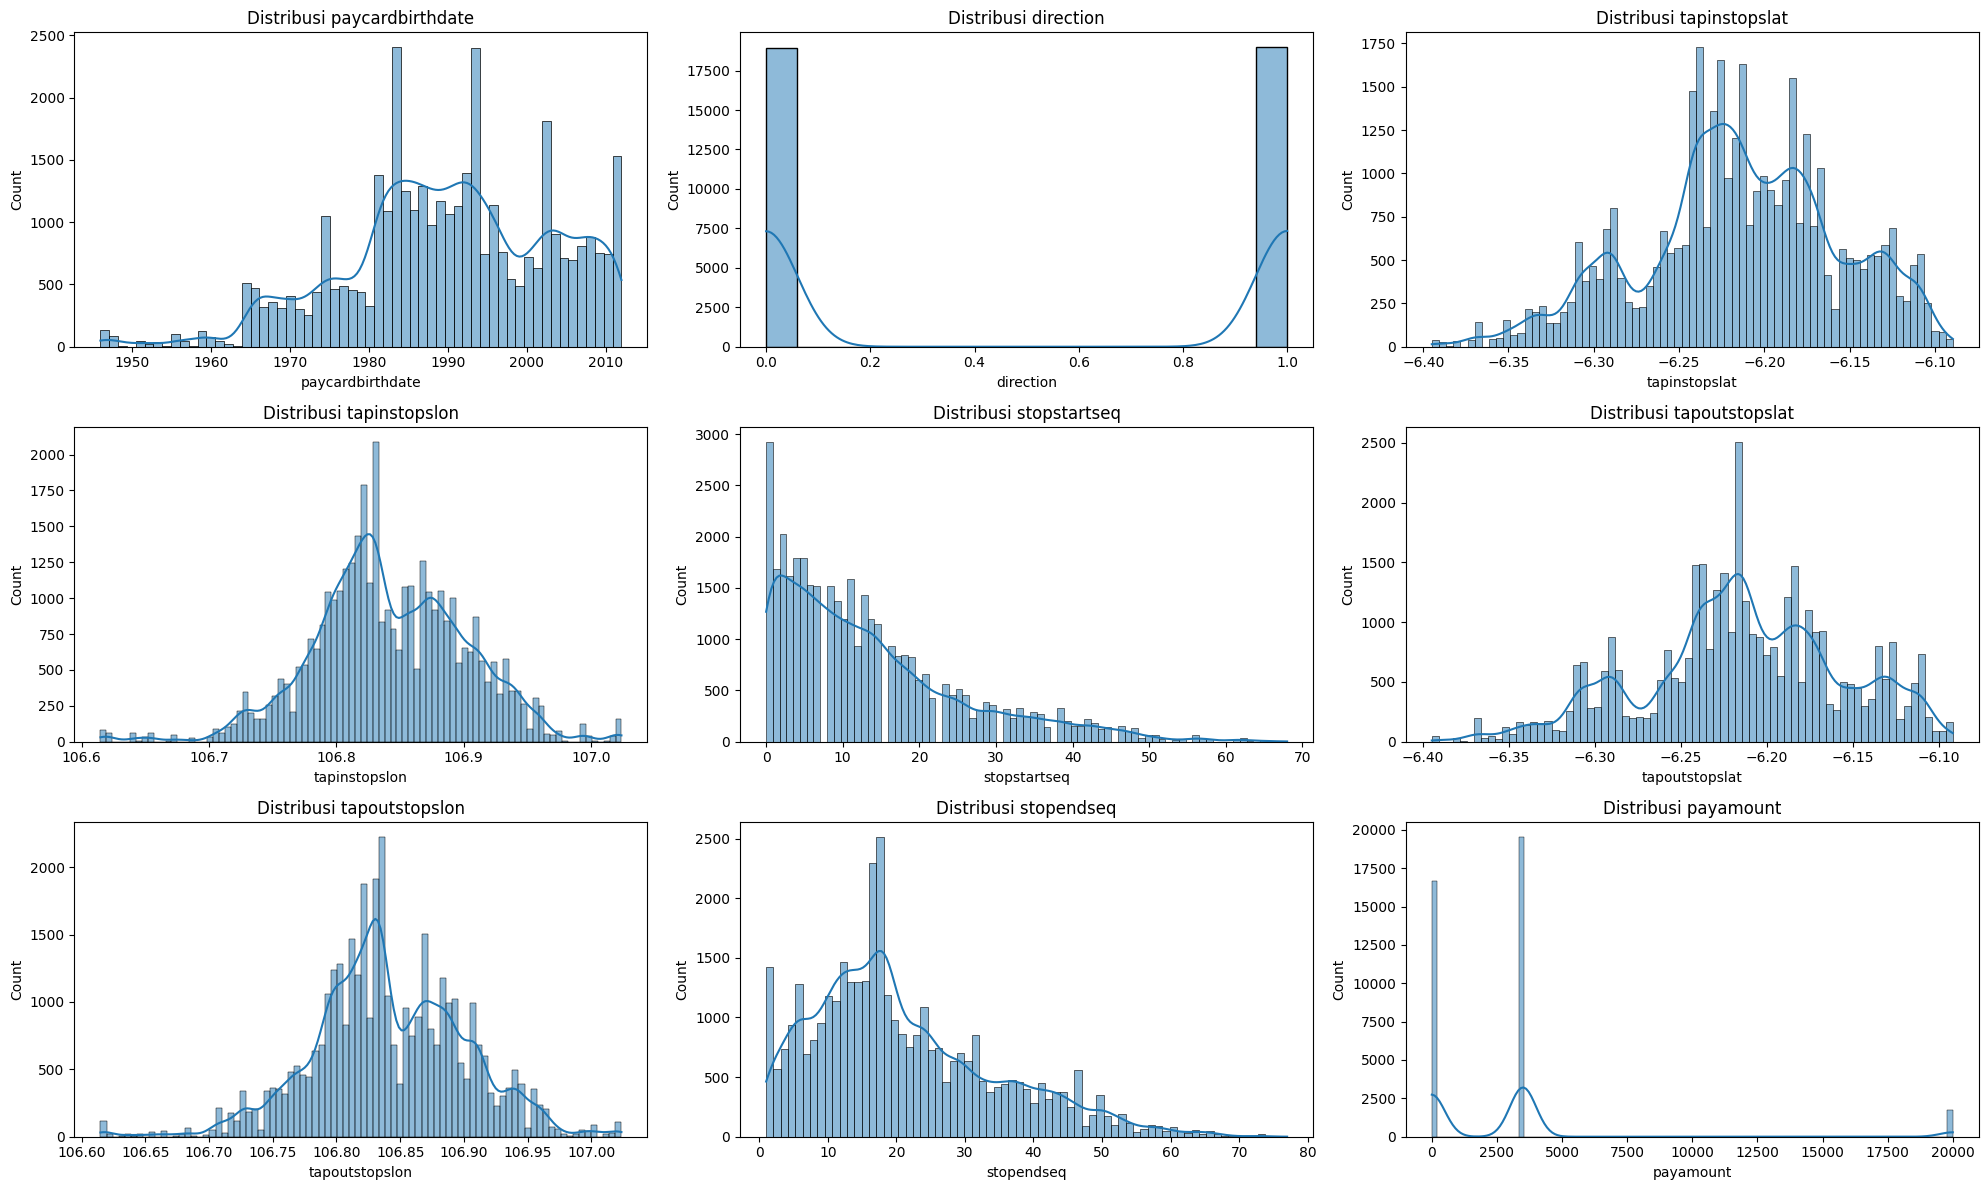

In [63]:
# --- KODE 2 ---

numeric_cols = ['paycardbirthdate', 'direction', 'tapinstopslat', 'tapinstopslon', 
                'stopstartseq', 'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'payamount']

# categorical_cols = ['transid','paycardid','paycardbank', 'paycardname', 'paycardsex', 'corridorid', 'corridorname', 
#                     'tapinstops', 'tapoutstops', 'tapoutstopsname', 'tapintimenew', 'tapouttimenew']

plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dfJEP[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# plt.figure(figsize=(20, 10))
# for i, col in enumerate(categorical_cols, 1):
#     plt.subplot(2, 2, i)
#     sns.countplot(y=dfJEP[col], order = dfJEP[col].value_counts().index)
#     plt.title(f'Jumlah {col}')
# plt.tight_layout()
# plt.show()

In [64]:
dfJEP.isna().sum()

transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
age                 0
dtype: int64

In [65]:
dfJEP.duplicated().sum()

0

In [66]:
dfJEP.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,stopstartseq,tapintime,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,tapouttime,payamount,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41


---

> ### **Tahapan: Cek Outlier dan Handling Outlier**

Berdasarkan hasil statistika deskriptif diatas yang sudah dilakukan maka didapatkan interprestasi bahwa variabel `paycardbirthdate`, `stopendseq` dan `payamount`teridentifikasi memiliki potensi outlier. Saya akan menggunakan 2 metode:

1. **Analisis Visual:** Membuat plot untuk menampilkan distribusi dan menunjukkan potensi outlier.

2. **Analisis Statistik:** Menggunakan metode IQR (Interquartile Range) untuk mengidentifikasi outlier.


**Langkah pertama** adalah membuat plot untuk setiap kolom tersebut, dan kemudian saya akan melakukan analisis IQR untuk mengidentifikasi nilai-nilai yang jauh dari kuartil pertama dan ketiga. 

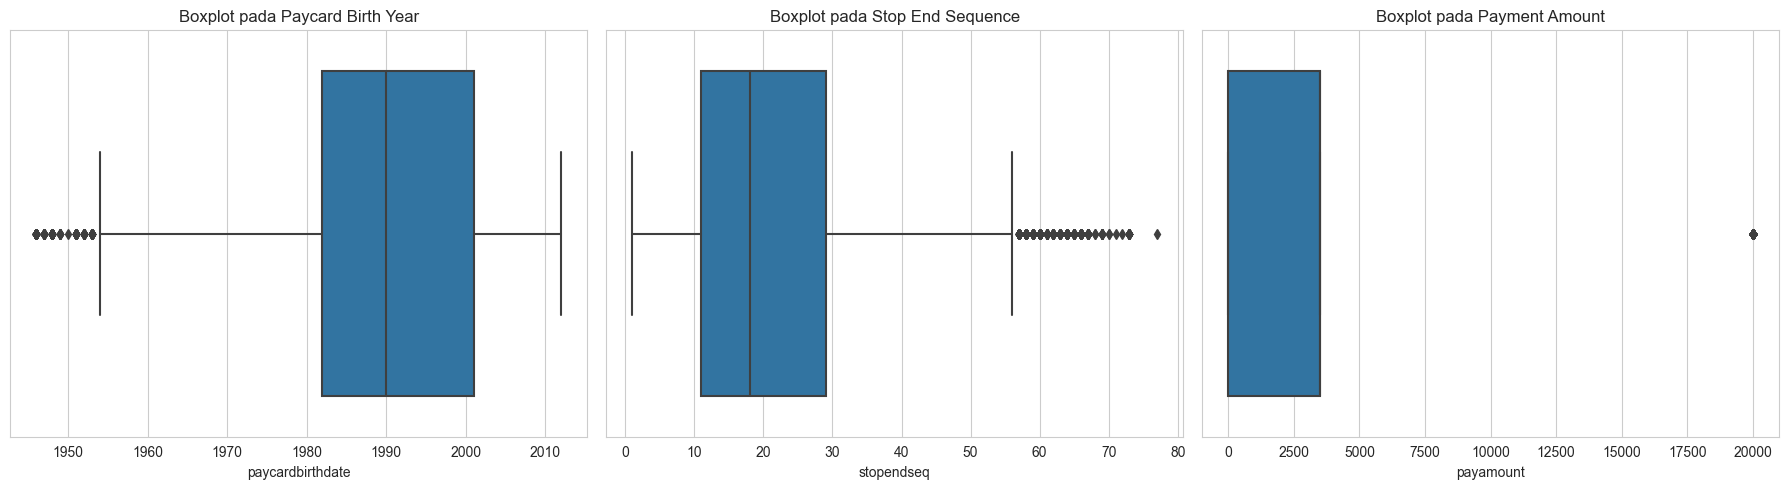

In [67]:
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot untuk 'paycardbirthdate'
sns.boxplot(x=dfJEP['paycardbirthdate'], ax=axes[0])
axes[0].set_title('Boxplot pada Paycard Birth Year')

# Plot untuk 'stopendseq'
sns.boxplot(x=dfJEP['stopendseq'], ax=axes[1])
axes[1].set_title('Boxplot pada Stop End Sequence')

# Plot untuk 'payamount'
sns.boxplot(x=dfJEP['payamount'], ax=axes[2])
axes[2].set_title('Boxplot pada Payment Amount')

plt.tight_layout()
plt.show()

### **Insight:**

Boxplot diatas untuk setiap kolom memberikan visualisasi yang jelas tentang distribusi dan potensi outlier:

- **paycardbirthyear:** terdapat beberapa nilai dibawah dan diatas kisaran umum, yang mungkin menunjukkan keberadaan pemegang kartu dengan usia yang sangat muda atau sangat tua. 
- **stopendsequence:** sejumlah nilai jauh lebih tinggi daripada kisaran umum, menunjukkan adanya perjalanan yang signifikan lebih panjang dari yang biasa
- **paymentamout:** sejumlah nilai yang sangat tinggi menunjukkan adanya transaksi dengan jumlah yang tidak biasa, mungkin lebih tinggi dari tarif standar. 

Selanjutnya, melakukan analisis IQR untuk mengidentifikasi dan meninjau nilai-nilai yang dianggap outlier berdasarkan kriteria statistik. Ini akan membantu kita memahami beberapa banyak dan seberapa ekstrem outlier tersebut. 

In [68]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_birthyear = identify_outliers_iqr(dfJEP['paycardbirthdate'])
outliers_stopendseq = identify_outliers_iqr(dfJEP['stopendseq'])
outliers_payamount = identify_outliers_iqr(dfJEP['payamount'])

outliers_summary = {
    "Outlier pada Birth Year": outliers_birthyear.describe(), 
    "Outlier pada Stop End Sequence": outliers_stopendseq.describe(),
    "Outlier pada Payment Amount": outliers_payamount.describe()
}

outliers_summary

{'Outlier pada Birth Year': count     340.000000
 mean     1948.514706
 std         2.527096
 min      1946.000000
 25%      1946.000000
 50%      1948.000000
 75%      1951.000000
 max      1953.000000
 Name: paycardbirthdate, dtype: float64,
 'Outlier pada Stop End Sequence': count    583.000000
 mean      61.452830
 std        4.080052
 min       57.000000
 25%       58.000000
 50%       60.000000
 75%       64.000000
 max       77.000000
 Name: stopendseq, dtype: float64,
 'Outlier pada Payment Amount': count     1742.0
 mean     20000.0
 std          0.0
 min      20000.0
 25%      20000.0
 50%      20000.0
 75%      20000.0
 max      20000.0
 Name: payamount, dtype: float64}

**Insight:**

1. **Outlier paycardbirthdate** 
- Jumlah: 340
- Rata-rata tahun lahir: 1948.51
- Rentang tahun lahir: 1946-1953 

*Outlier ini menunjukkan adanya pemegang kartu dengan tahun lahir yang lebih tua daripada yang umumnya diharapkan, kemungkinan usia 70-an dan 80-an. Ini mungkin memerlukan peninjauan lebih lanjut untuk memastikan kevalidan atau memahami konteksnya.*

2. **Outlier stopendseq** 
- Jumlah: 583
- Rata-rata urutan: 61.45
- Rentang urutan: 57-77

*Outlier ini menunjukkan adanya perjalanan yang signifikan lebih panjang dari biasanya. ini bisa mengindikasikan rute khusus, perjalanan yang tidak biasa, atau mungkin kesalahan dalam data.*

3. **Outlier payamount**
- Jumlah: 1742
- Nilai: Semua 20000

*Semua outlier di kolom jumlah pembayaran adalah transaksi dengan jumlah 20000, yang jauh lebih tinggi daripada pembayaran standar. ini bisa menunjukkan adanya transaksi khusus atau tidak biasa, atau mungkin kesalahan dalam pencatatan data*


### Handling Outlier

Berikut ini adalah beberapa metode yang umum digunakan:

1. **Trimming:** Menghapus outlier dari dataset.
2. **Winsorizing**: Mengganti outlier dengan nilai tertinggi atau terendah dalam rentang data yang tidak termasuk outlier.
3. **Transformasi:** Menggunakan transformasi matematika untuk mengurangi dampak outlier, seperti log, akar kuadrat, atau transformasi Box-Cox.
4. **Imputasi:** Mengganti outlier dengan statistik seperti median atau mean dari data.
5. **Modeling Robust:** Menggunakan model statistik atau machine learning yang kurang sensitif terhadap outlier.

In [69]:
# 1. handling outlier pada paycardbirthdate:
# strategi: mengganti outlier dengan median tahun lahir.

median_birthyear = dfJEP['paycardbirthdate'].median()
dfJEP['paycardbirthdate'] = dfJEP['paycardbirthdate'].apply(lambda x: median_birthyear if x < 1946 or x > 2012 else x)

# Insight & Interprestasi:
# - Justifikasi --> mengganti outlier dengan median membantu mempertahankan distribusi umur penumpang yang lebih realistis tanpa kehilangan banyak data.
# - Interprestasi --> data yang dibersihkan akan memberikan gambaran yang lebih akurat tentang demografi penumpang, yang penting untuk perencanaan layanan dan alokasi sumber daya.

In [70]:
#2. handling outlier pada stopendseq
# strategi: memisahkan dan menganalisis.

upper_limit_stopendseq = dfJEP['stopendseq'].quantile(0.75) + 1.5 * (dfJEP['stopendseq'].quantile(0.75) - dfJEP['stopendseq'].quantile(0.25))
regular_trips = dfJEP[dfJEP['stopendseq'] <= upper_limit_stopendseq]
long_trips = dfJEP[dfJEP['stopendseq'] > upper_limit_stopendseq]

# Insight & Interpretasi:
# - Justifikasi --> memisahkan perjalanan panjang memungkinkan analisis terfokus untuk memahami dan mengoptimalkan rute tersebut.
# - Interpretasi --> identifikasi perjalanan panjang dapat mengungkapkan kebutuhan untuk penyesuaian jadwal/peningkatan kapasitas pada waktu tertentu, meningkatkan efisiensi operasional secara keseluruhan.

In [71]:
#3. handling outlier pada payamount
# strategi: verifikasi dan pengelompokan.

free_trips = dfJEP[dfJEP['payamount'] == 0]
standard_fare_trips = dfJEP[(dfJEP['payamount'] > 0) & (dfJEP['payamount'] <= 3500)]
high_fare_trips = dfJEP[dfJEP['payamount'] > 3500]  # Sesuaikan batas sesuai kebijakan tarif

# Insight & Interpretasi:
# - Justifikasi --> mengklasifikasikan transaksi berdasarkan jumlah pembayaran membantu dalam memahami struktur pendapatan dan mengidentifikasi anomali.
# - Interpretasi --> analisis lanjutan pada setiap kategori dapat mengungkapkan area untuk peningkatan efisiensi tarif, deteksi penipuan, atau penyesuaian kebijakan harga.

### Kembali Melakukan Analisis Visual

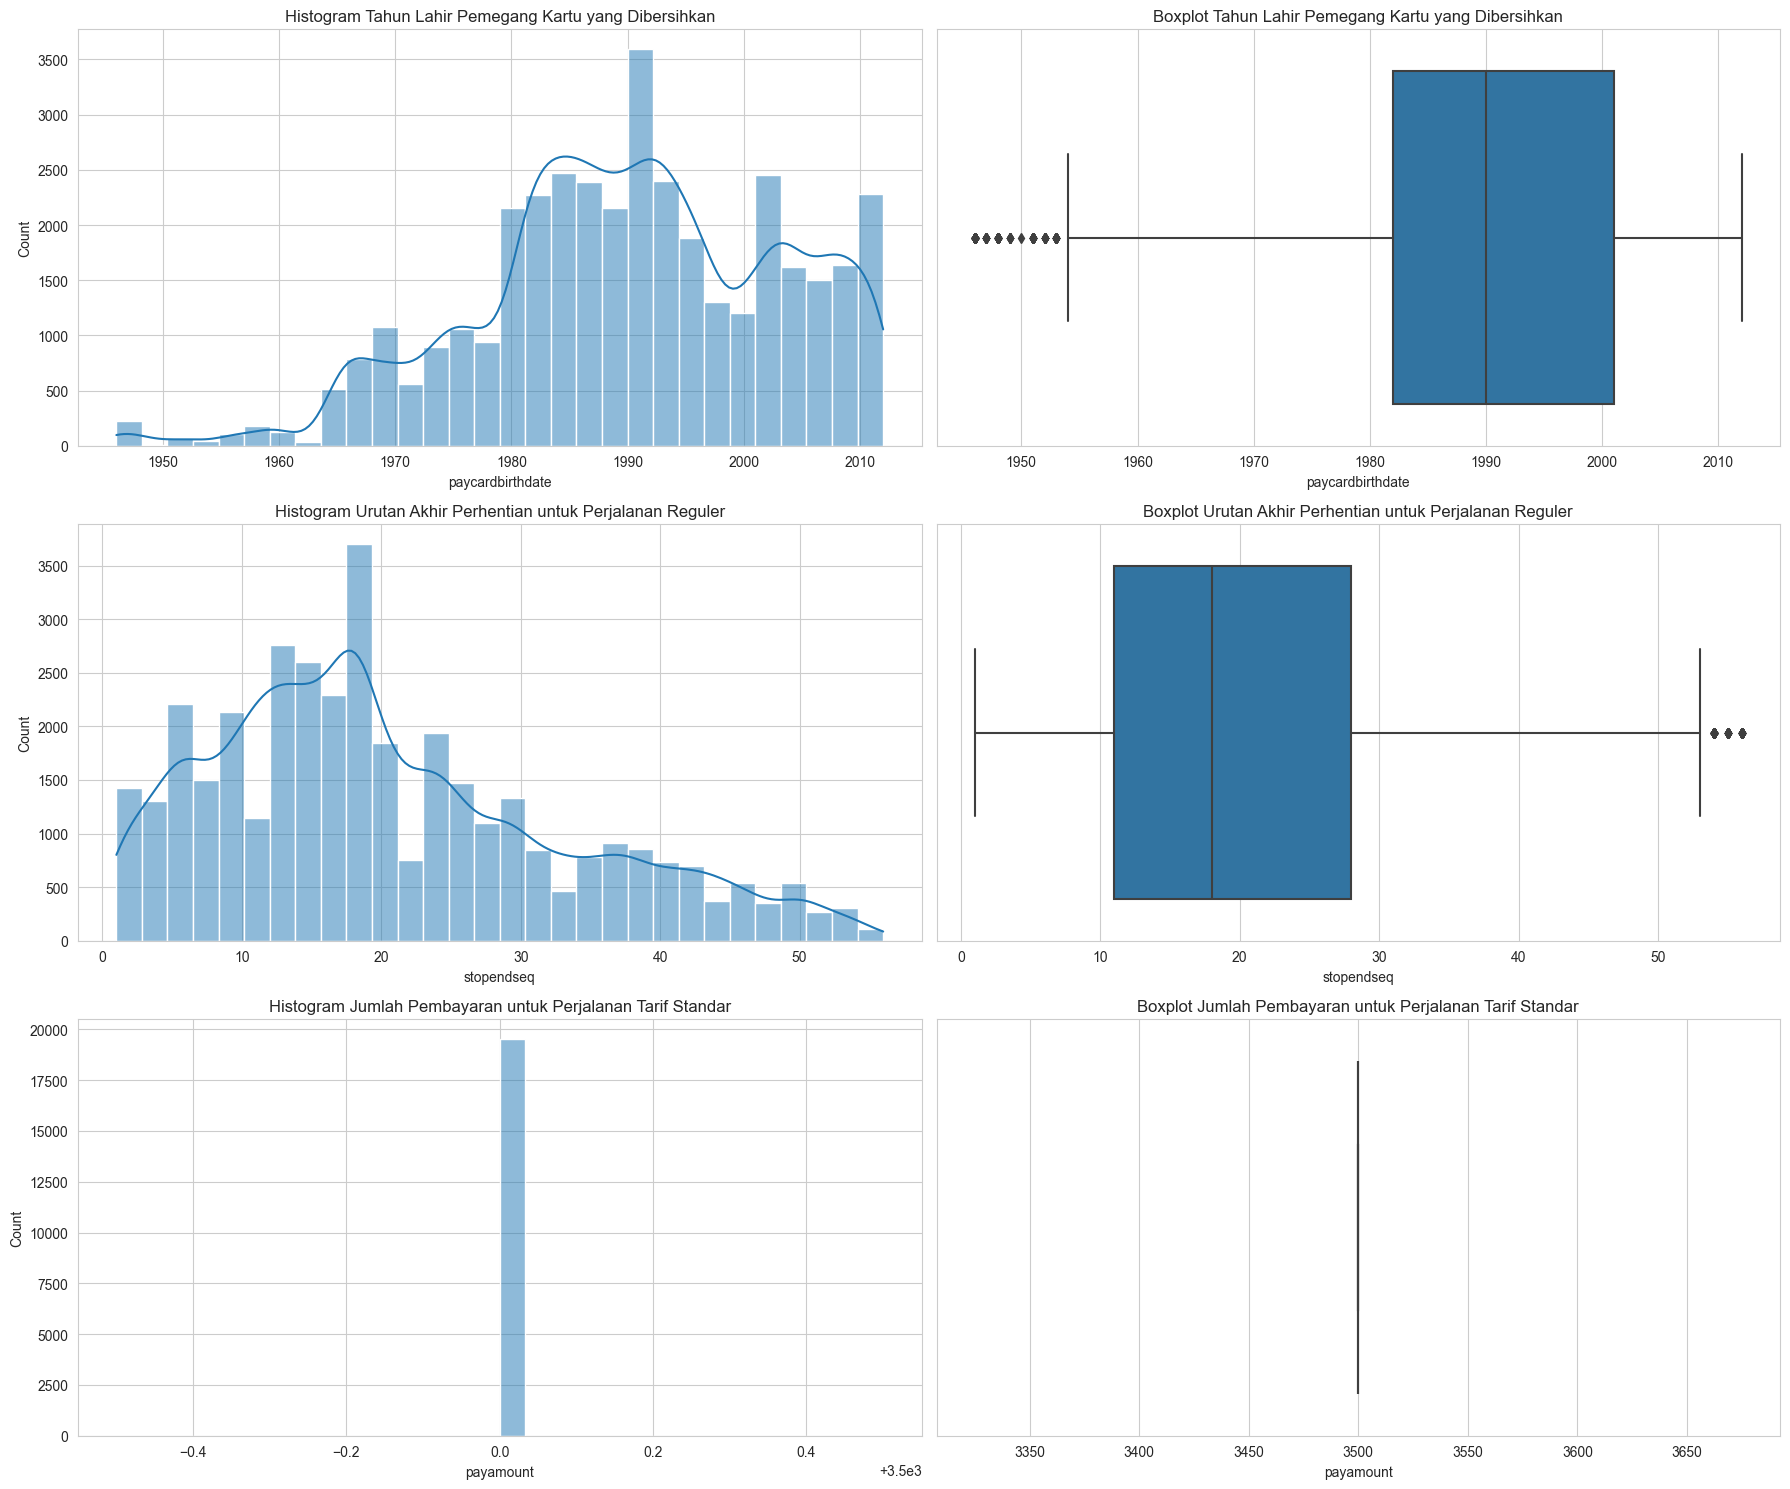

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya estetika plot
sns.set_style("whitegrid")

# Membuat subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Histogram dan Boxplot untuk 'paycardbirthdate_clean'
sns.histplot(dfJEP['paycardbirthdate'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram Tahun Lahir Pemegang Kartu yang Dibersihkan')
sns.boxplot(x=dfJEP['paycardbirthdate'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot Tahun Lahir Pemegang Kartu yang Dibersihkan')

# Histogram dan Boxplot untuk 'stopendseq' dari perjalanan reguler
sns.histplot(regular_trips['stopendseq'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram Urutan Akhir Perhentian untuk Perjalanan Reguler')
sns.boxplot(x=regular_trips['stopendseq'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Urutan Akhir Perhentian untuk Perjalanan Reguler')

# Histogram dan Boxplot untuk 'payamount' dari perjalanan tarif standar
sns.histplot(standard_fare_trips['payamount'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram Jumlah Pembayaran untuk Perjalanan Tarif Standar')
sns.boxplot(x=standard_fare_trips['payamount'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot Jumlah Pembayaran untuk Perjalanan Tarif Standar')

plt.tight_layout()
plt.show()

### Kembali Melakukan Statistik Deskriptif

In [73]:
# Menghitung statistik deskriptif untuk kolom yang disesuaikan
descriptive_stats_updated = {
    'Tahun Lahir Pemegang Kartu yang Dibersihkan': dfJEP['paycardbirthdate'].describe(),
    'Urutan Akhir Perhentian untuk Perjalanan Reguler': regular_trips['stopendseq'].describe(),
    'Jumlah Pembayaran untuk Perjalanan Tarif Standar': standard_fare_trips['payamount'].describe()
}

# Mencetak statistik deskriptif yang diperbarui
for key, value in descriptive_stats_updated.items():
    print(f"{key}:\n{value}\n")

Tahun Lahir Pemegang Kartu yang Dibersihkan:
count    37900.000000
mean      1990.089314
std         13.051482
min       1946.000000
25%       1982.000000
50%       1990.000000
75%       2001.000000
max       2012.000000
Name: paycardbirthdate, dtype: float64

Urutan Akhir Perhentian untuk Perjalanan Reguler:
count    37317.000000
mean        20.475387
std         12.682471
min          1.000000
25%         11.000000
50%         18.000000
75%         28.000000
max         56.000000
Name: stopendseq, dtype: float64

Jumlah Pembayaran untuk Perjalanan Tarif Standar:
count    19510.0
mean      3500.0
std          0.0
min       3500.0
25%       3500.0
50%       3500.0
75%       3500.0
max       3500.0
Name: payamount, dtype: float64



### Melakukan Analisis Lanjutan

- untuk tahapan analisis lanjutan ini, akan fokus pada teknik yang dapat membantu mengungkap pola tambahan, anomali, atau insight dari data kolom `paycardbirthdate`, `stopendseq`, dan `payamount`. Salah satu pendekatan yang efektif untuk ini adalah analisis korelasi dan clustering. 

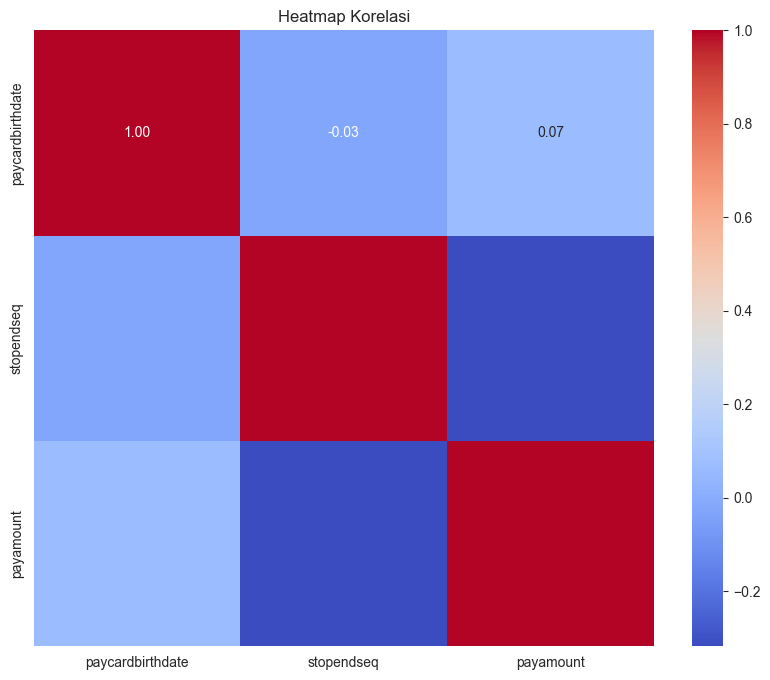

In [74]:
# 1. Analisis Korelasi
# Analisis korelasi akan membantu memahami hubungan antara variabel-variable yang berbeda. seperti: apakah jumlah pembayaran lebih tinggi pada rute tertentu atau pada waktu tertentu.

import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antara kolom yang relevan
correlation_matrix = dfJEP[['paycardbirthdate', 'stopendseq', 'payamount']].corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

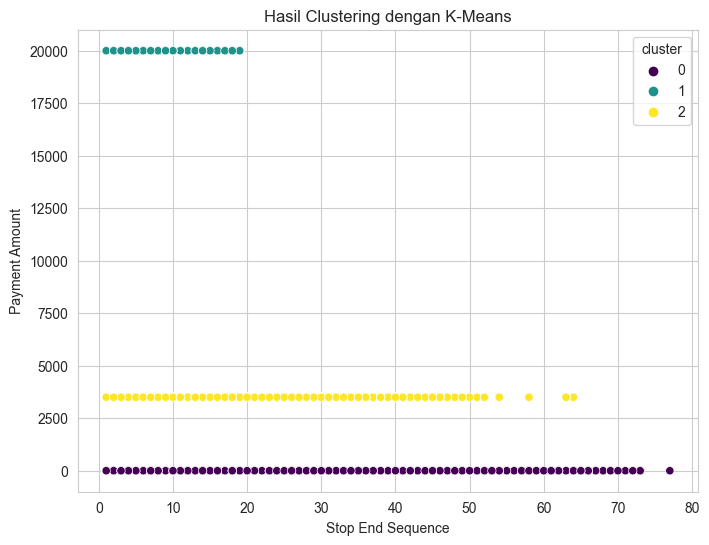

In [75]:
# 2. Clustering:
# Clustering dapat membantu mengidentifikasi segmen/kelompok dalam data seperti kelompok perjalanan yang memiliki karakteristik serupa.

from sklearn.cluster import KMeans
import numpy as np

# Menyiapkan data untuk clustering (mungkin perlu normalisasi atau preprocessing)
X = dfJEP[['paycardbirthdate', 'stopendseq', 'payamount']].values

# Menentukan jumlah cluster (k) yang diinginkan
k = 3  # Contoh: 3 cluster

# Melakukan K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Mendapatkan label cluster untuk setiap data point
dfJEP['cluster'] = kmeans.labels_

# Visualisasi hasil clustering (gunakan PCA atau t-SNE untuk reduksi dimensi jika perlu)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=dfJEP['cluster'], palette='viridis')
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Stop End Sequence')
plt.ylabel('Payment Amount')
plt.show()

### **Interpretasi:**

- **analisis korelasi:** hasil analisis korelasi akan menunjukkan seberapa erat hubungan antara usia penumpang, urutan perhentian, dan jumlah pembayaran. Ini bisa membantu dalam merumuskan strategi harga atau menyesuaikan jadwal rute.
- **clustering:** hasil clustering akan membantu mengidentifikasi segmen penumpang atau pola perjalanan yang berbeda. Misalnya mungkin ada kelompok penumpang yang sering melakukan perjalanan panjang dengan tarif tinggi atau sebaliknya. 

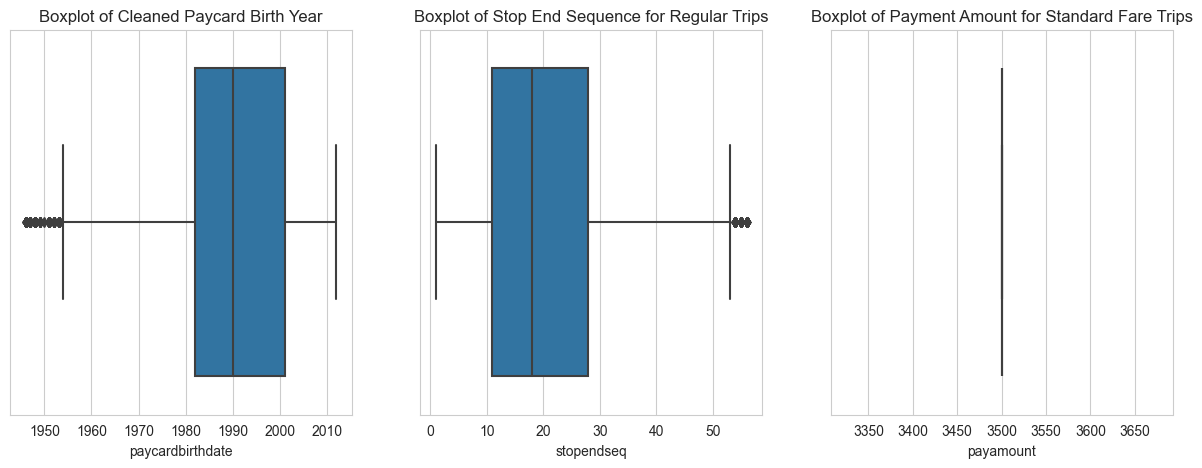

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=dfJEP['paycardbirthdate'])
plt.title('Boxplot of Cleaned Paycard Birth Year')

plt.subplot(1, 3, 2)
sns.boxplot(x=regular_trips['stopendseq'])
plt.title('Boxplot of Stop End Sequence for Regular Trips')

plt.subplot(1, 3, 3)
sns.boxplot(x=standard_fare_trips['payamount'])
plt.title('Boxplot of Payment Amount for Standard Fare Trips')

plt.show()

In [77]:
# Menghitung statistik deskriptif untuk kolom yang disesuaikan
descriptive_stats_updated = {
    'Tahun Lahir Pemegang Kartu yang Dibersihkan': dfJEP['paycardbirthdate'].describe(),
    'Urutan Akhir Perhentian untuk Perjalanan Reguler': regular_trips['stopendseq'].describe(),
    'Jumlah Pembayaran untuk Perjalanan Tarif Standar': standard_fare_trips['payamount'].describe()
}

# Mencetak statistik deskriptif yang diperbarui
for key, value in descriptive_stats_updated.items():
    print(f"{key}:\n{value}\n")

Tahun Lahir Pemegang Kartu yang Dibersihkan:
count    37900.000000
mean      1990.089314
std         13.051482
min       1946.000000
25%       1982.000000
50%       1990.000000
75%       2001.000000
max       2012.000000
Name: paycardbirthdate, dtype: float64

Urutan Akhir Perhentian untuk Perjalanan Reguler:
count    37317.000000
mean        20.475387
std         12.682471
min          1.000000
25%         11.000000
50%         18.000000
75%         28.000000
max         56.000000
Name: stopendseq, dtype: float64

Jumlah Pembayaran untuk Perjalanan Tarif Standar:
count    19510.0
mean      3500.0
std          0.0
min       3500.0
25%       3500.0
50%       3500.0
75%       3500.0
max       3500.0
Name: payamount, dtype: float64



In [78]:
# from scipy.stats import zscore

# dfJEP['birthdatezscore'] = zscore(dfJEP['paycardbirthdate'])
# outliers_birthdate = dfJEP[(dfJEP['birthdatezscore'] < -3) | (dfJEP['birthdatezscore'] > 3)]
# print("Jumlah outlier setelah pembersihan pada tahun lahir:", len(outliers_birthdate))

In [79]:
# dfJEP['stopendseqzscore'] = zscore(regular_trips['stopendseq'])  # Pastikan Anda menggunakan data perjalanan reguler
# outliers_stopendseq = dfJEP[(dfJEP['stopendseqzscore'] < -3) | (dfJEP['stopendseqzscore'] > 3)]
# print("Jumlah outlier setelah pembersihan pada urutan akhir perhentian:", len(outliers_stopendseq))

In [80]:
# dfJEP['payamountzscore'] = zscore(standard_fare_trips['payamount'])  # Pastikan menggunakan data tarif standar
# outliers_payamount = dfJEP[(dfJEP['payamountzscore'] < -3) | (dfJEP['payamountzscore'] > 3)]
# print("Jumlah outlier setelah pembersihan pada jumlah pembayaran:", len(outliers_payamount))

In [81]:
# dfJEP.isna().sum()

In [82]:
# dfJEP['stopendseqzscore'].value_counts

In [83]:
# data_cleaned = dfJEP.dropna(subset=['stopendseqzscore'])

In [84]:
# data_cleaned = dfJEP.dropna(subset=['payamountzscore'])

In [85]:
dfJEP.isna().sum()

transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
age                 0
cluster             0
dtype: int64

In [86]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in dfJEP.columns :
    listItem.append( [col, dfJEP[col].nunique(), dfJEP[col].unique(), dfJEP[col].isna().sum()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Missing Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Missing Values
0,transid,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]",0
1,paycardid,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]",0
2,paycardbank,6,"[emoney, dki, flazz, online, brizzi, bni]",0
3,paycardname,1975,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Devi Hariyah, Darmanto Rajasa, Cagak Maheswara, Dadap Pradana, Oskar Widiastuti, Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, Lutfan Nurdiyanti, Sari Nababan, Ophelia Haryanti, Adikara Kurniawan, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana, Tgk Ilsa, Drs Nadia, drg Lukman, Ibrahim Pray

---

In [87]:
# dfJEP['stopendseqzscore'] = dfJEP['stopendseqzscore'].fillna(0)
# dfJEP['payamountzscore'] = dfJEP['payamountzscore'].fillna(0)

In [88]:
dfJEP.isna().sum()

transid             0
paycardid           0
paycardbank         0
paycardname         0
paycardsex          0
paycardbirthdate    0
corridorid          0
corridorname        0
direction           0
tapinstops          0
tapinstopsname      0
tapinstopslat       0
tapinstopslon       0
stopstartseq        0
tapintime           0
tapoutstops         0
tapoutstopsname     0
tapoutstopslat      0
tapoutstopslon      0
stopendseq          0
tapouttime          0
payamount           0
age                 0
cluster             0
dtype: int64

In [89]:
# dfJEP.drop(columns=['stopendseqzscore', 'birthdatezscore', 'cluster'],inplace=True)

In [90]:
dfJEP.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount', 'age', 'cluster'],
      dtype='object')

In [91]:
# dfJEP['tapintimedate'] = dfJEP['tapintimedate'].astype(str)
# dfJEP['tapintimenew'] = dfJEP['tapintimenew'].astype(str)

# dfJEP['tapintime'] = pd.to_datetime(dfJEP['tapintimedate'] + ' ' + dfJEP['tapintimenew'])

# dfJEP['tapouttimedate'] = dfJEP['tapouttimedate'].astype(str)
# dfJEP['tapouttimenew'] = dfJEP['tapouttimenew'].astype(str)
# dfJEP['tapouttime'] = pd.to_datetime(dfJEP['tapouttimedate'] + ' ' + dfJEP['tapouttimenew'])

In [92]:
# dfJEP.drop(columns=['tapintimedate', 'tapintimenew', 'tapouttimedate', 'tapouttimenew', 'cluster'],inplace=True)

In [93]:
dfJEP.columns

Index(['transid', 'paycardid', 'paycardbank', 'paycardname', 'paycardsex',
       'paycardbirthdate', 'corridorid', 'corridorname', 'direction',
       'tapinstops', 'tapinstopsname', 'tapinstopslat', 'tapinstopslon',
       'stopstartseq', 'tapintime', 'tapoutstops', 'tapoutstopsname',
       'tapoutstopslat', 'tapoutstopslon', 'stopendseq', 'tapouttime',
       'payamount', 'age', 'cluster'],
      dtype='object')

In [94]:
dfJEP.dtypes

transid              object
paycardid            object
paycardbank          object
paycardname          object
paycardsex           object
paycardbirthdate      int64
corridorid           object
corridorname         object
direction           float64
tapinstops           object
tapinstopsname       object
tapinstopslat       float64
tapinstopslon       float64
stopstartseq          int64
tapintime            object
tapoutstops          object
tapoutstopsname      object
tapoutstopslat      float64
tapoutstopslon      float64
stopendseq          float64
tapouttime           object
payamount           float64
age                   int64
cluster               int32
dtype: object

---

---

In [95]:
# dfJEP.to_csv('TransJakarta(1).csv', index=False)
dfjep = pd.read_csv('TransJakarta(1).csv')
dfjep

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,stopstartseq,tapoutstops,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,payamount,age,tapintime,tapouttime
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,7,P00253,Tegalan,-6.203101,106.85715,12,3500,15,2023-04-03 05:21:44,2023-04-03 06:00:53
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,13,B03307P,Sampoerna Strategic,-6.217152,106.81892,21,3500,26,2023-04-03 05:42:44,2023-04-03 06:40:01
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,38,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39,3500,31,2023-04-03 05:59:06,2023-04-03 06:50:55
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,23,B03090P,Raya Penggilingan,-6.183068,106.93194,29,3500,45,2023-04-03 05:44:51,2023-04-03 06:28:16
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,5,P00098,Kali Besar Barat,-6.135355,106.81143,15,3500,41,2023-04-03 06:17:35,2023-04-03 06:57:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1,P00261,...,2,P00228,SMK 57,-6.290967,106.82365,13,3500,19,2023-04-21 18:18:37,2023-04-21 19:55:49
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1,P00064,...,1,P00179,Pinang Ranti,-6.291075,106.88634,2,3500,49,2023-04-18 21:52:31,2023-04-18 22:28:22
37897,YXPP627N4G95HO,213159426675861,emoney,drg Zahra,F,1976,1T,Cibubur - Balai Kota,1,B02873P,...,12,B00226P,Buperta Cibubur,-6.370321,106.89628,14,20000,47,2023-04-04 10:29:47,2023-04-04 13:27:25
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK13,Tanah Abang - Jembatan Lima,1,B02505P,...,33,B01787P,JPO Blok G,-6.188861,106.81135,34,0,47,2023-04-15 19:59:26,2023-04-15 20:27:50


In [96]:
cleaned_data = dfjep.drop(dfjep[dfjep['tapouttime'] < dfjep['tapintime']].index)
cleaned_data = cleaned_data.drop(cleaned_data[cleaned_data['payamount'] > 10000].index)
cleaned_data = cleaned_data.drop(cleaned_data[(cleaned_data['age'] < 15) | (cleaned_data['age'] > 70)].index)

lat_min = -6.4  
lat_max = -6.0  
lon_min = 106.6  
lon_max = 107.0 
cleaned_data = cleaned_data.drop(cleaned_data[(cleaned_data['tapinstopslat'] < lat_min) | (cleaned_data['tapinstopslat'] > lat_max) |
                                            (cleaned_data['tapinstopslon'] < lon_min) | (cleaned_data['tapinstopslon'] > lon_max) |
                                            (cleaned_data['tapoutstopslat'] < lat_min) | (cleaned_data['tapoutstopslat'] > lat_max) |
                                            (cleaned_data['tapoutstopslon'] < lon_min) | (cleaned_data['tapoutstopslon'] > lon_max)].index)

original_count = len(dfjep)
cleaned_count = len(cleaned_data)
removed_records = original_count - cleaned_count

original_count, cleaned_count, removed_records


(37900, 31871, 6029)

### **Insight & Justifikasi**

1. `Mengatasi Anomali Waktu`
- **Insight:** catatan dengan waktu tap out sebelum tap in kemungkinan besar adalah kesalahan pencatatan/anomali sistem.  Menghapus catatan ini penting karena dapat mendistorsi analisis terkait durasi perjalanan, frekuensi penggunaan, dan pola pergerakan penumpang.

- **Justifikasi:** Menjaga integritas temporal data, memastikan bahwa perhitungan yang bergantung pada waktu masuk dan keluar (seperti durasi perjalanan) akurat dan dapat diandalkan.

2. `Mengatasi Anomali Payamount`

- **Insight:**
    - Pembayaran Nol: Dipertahankan karena bisa jadi merupakan tumpangan gratis atau promosi. Ini mengakomodasi kemungkinan kebijakan atau kejadian khusus tanpa menghilangkan data yang mungkin signifikan.
    - Pembayaran Tinggi (>10.000): Dihapus karena dianggap outlier atau kesalahan. Pembayaran yang sangat tinggi mungkin menandakan kesalahan entri atau masalah sistem dan dapat mendistorsi analisis keuangan atau pemetaan tarif.

- **Justifikasi:** Menyeimbangkan antara mempertahankan potensi kasus valid (pembayaran nol) dan menghilangkan data yang kemungkinan besar salah atau tidak wajar (pembayaran tinggi), memastikan analisis biaya dan pendapatan yang lebih akurat.

3. `Mengatasi Anomali Usia`
- **Insight:** Sementara penumpang di semua usia menggunakan transportasi umum, usia di bawah 15 dan di atas 70 mungkin kurang umum atau menandakan kesalahan entri.

- **Justifikasi:** Pendekatan ini mengurangi risiko distorsi dalam analisis demografis penumpang. Namun, ini juga bisa menghilangkan data valid dan harus ditinjau lebih lanjut untuk memastikan bahwa tidak menghilangkan kelompok penumpang penting.

4. `Mengatasi Anomali Geografis`
- **Insight:** Koordinat yang jauh di luar batas kota menandakan kesalahan GPS atau entri data. Data ini bisa mendistorsi analisis geospasial seperti pemetaan rute, distribusi penumpang, dan analisis zona.

- **Justifikasi:** Memastikan keakuratan geografis data. Dengan menghilangkan data geospasial yang tidak masuk akal, analisis yang berkaitan dengan lokasi dan pergerakan menjadi lebih andal.


*Ringkasan Hasil*

- Jumlah baris asli: 37900
- Jumlah baris setelah pembersihan: 31871
- Total baris dihapus: 6029

In [97]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in dfjep.columns :
    listItem.append( [col, dfjep[col].nunique(), dfjep[col].unique(), dfjep[col].isna().sum()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Missing Values'],
                data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Missing Values
0,transid,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]",0
1,paycardid,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]",0
2,paycardbank,6,"[emoney, dki, flazz, online, brizzi, bni]",0
3,paycardname,1975,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Devi Hariyah, Darmanto Rajasa, Cagak Maheswara, Dadap Pradana, Oskar Widiastuti, Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, Lutfan Nurdiyanti, Sari Nababan, Ophelia Haryanti, Adikara Kurniawan, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana, Tgk Ilsa, Drs Nadia, drg Lukman, Ibrahim Pray

In [98]:
# dfjep.to_csv('TransJakartaNew(2).csv', index=False)
# df = pd.read_csv('TransJakartaNew(2).csv')
# df

In [99]:
listItem = []
for col in dfjep.columns :
    listItem.append([col, dfjep[col].dtype, dfjep[col].isna().sum(),
                    dfjep[col].nunique(), list(dfjep[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                    data=listItem)
print(dfjep.shape)
dfDesc

(37900, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,transid,object,0,37900,"[RMXP585Y0P65HM, NMLO589I2W22PI]"
1,paycardid,int64,0,2000,"[4384998305312935092, 4128076101888382603]"
2,paycardbank,object,0,6,"[dki, bni]"
3,paycardname,object,0,1975,"[Emin Hutagalung, Widya Mulyani]"
4,paycardsex,object,0,2,"[M, F]"
5,paycardbirthdate,int64,0,67,"[1970, 1952]"
6,corridorid,object,0,221,"[D11, JAK85]"
7,corridorname,object,0,216,"[BSD - Jelambar, S. Parman - Tanah Abang]"
8,direction,int64,0,2,"[1, 0]"
9,tapinstops,object,0,2570,"[B04147P, B00764P]"


In [100]:
# Ubah tipe data 'tapintime' dan 'tapouttime' menjadi datetime.
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

In [101]:
dfjep.dtypes

transid                     object
paycardid                    int64
paycardbank                 object
paycardname                 object
paycardsex                  object
paycardbirthdate             int64
corridorid                  object
corridorname                object
direction                    int64
tapinstops                  object
tapinstopsname              object
tapinstopslat              float64
tapinstopslon              float64
stopstartseq                 int64
tapoutstops                 object
tapoutstopsname             object
tapoutstopslat             float64
tapoutstopslon             float64
stopendseq                   int64
payamount                    int64
age                          int64
tapintime           datetime64[ns]
tapouttime          datetime64[ns]
dtype: object

In [102]:
# Melakukan pemeriksaan lebih lanjut untuk memeriksa anomali yang tersisa.
# Memeriksa statistik dasar untuk kolom numerik untuk mengidentifikasi potensi anomali baru.
numerical_stats = dfjep.describe()

# Checking the distribution of categorical data to identify any potential new anomalies or inconsistencies.
categorical_columns = dfjep.select_dtypes(include=['object']).columns
categorical_stats = {column: dfjep[column].value_counts() for column in categorical_columns}

numerical_stats, categorical_stats.keys()

(          paycardid  paycardbirthdate     direction  tapinstopslat  \
 count  3.790000e+04      37900.000000  37900.000000   37900.000000   
 mean   4.250060e+17       1990.089314      0.500633      -6.214838   
 min    6.040368e+10       1946.000000      0.000000      -6.394973   
 25%    1.800442e+14       1982.000000      0.000000      -6.245863   
 50%    3.507947e+15       1990.000000      1.000000      -6.214587   
 75%    4.699023e+15       2001.000000      1.000000      -6.175528   
 max    4.997694e+18       2012.000000      1.000000      -6.089429   
 std    1.321699e+18         13.051482      0.500006       0.057911   
 
        tapinstopslon  stopstartseq  tapoutstopslat  tapoutstopslon  \
 count   37900.000000  37900.000000    37900.000000    37900.000000   
 mean      106.841554     13.572480       -6.214654      106.840997   
 min       106.614730      0.000000       -6.394973      106.614730   
 25%       106.803470      4.000000       -6.245440      106.801940   
 50%

In [103]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

lat_min, lat_max = -6.4, -6.0
lon_min, lon_max = 106.6, 107.0

# Langkah-langkah Pembersihan Data:

# 1. Menangani anomali waktu dengan menghapus catatan di mana waktu tap out lebih cepat dari waktu tap in.
dfjep = dfjep.drop(dfjep[dfjep['tapouttime'] < dfjep['tapintime']].index)

# 2. Menangani anomali pembayaran yang tinggi dengan menghapus catatan dengan pembayaran yang sangat tinggi (>10.000).
dfjep = dfjep.drop(dfjep[dfjep['payamount'] > 10000].index)

# 3. Menangani anomali usia dengan menghapus catatan dengan usia di bawah 15 tahun atau di atas 70 tahun.
dfjep = dfjep.drop(dfjep[(dfjep['age'] < 15) | (dfjep['age'] > 70)].index)

# 4. Menangani anomali geografis dengan menghapus catatan dengan koordinat di luar rentang yang diharapkan untuk Jakarta.
dfjep = dfjep.drop(dfjep[(dfjep['tapinstopslat'] < lat_min) | (dfjep['tapinstopslat'] > lat_max) |
                                        (dfjep['tapinstopslon'] < lon_min) | (dfjep['tapinstopslon'] > lon_max) |
                                        (dfjep['tapoutstopslat'] < lat_min) | (dfjep['tapoutstopslat'] > lat_max) |
                                        (dfjep['tapoutstopslon'] < lon_min) | (dfjep['tapoutstopslon'] > lon_max)].index)

original_count = len(dfjep)
cleaned_count = len(dfjep)
removed_records = original_count - cleaned_count

original_count, cleaned_count, removed_records

(31871, 31871, 0)

In [104]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31871 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transid           31871 non-null  object        
 1   paycardid         31871 non-null  int64         
 2   paycardbank       31871 non-null  object        
 3   paycardname       31871 non-null  object        
 4   paycardsex        31871 non-null  object        
 5   paycardbirthdate  31871 non-null  int64         
 6   corridorid        31871 non-null  object        
 7   corridorname      31871 non-null  object        
 8   direction         31871 non-null  int64         
 9   tapinstops        31871 non-null  object        
 10  tapinstopsname    31871 non-null  object        
 11  tapinstopslat     31871 non-null  float64       
 12  tapinstopslon     31871 non-null  float64       
 13  stopstartseq      31871 non-null  int64         
 14  tapoutstops       31871 non

### **Interpretasi & Insight:**

1. **Mengatasi Anomali Waktu:** Menghapus catatan di mana waktu tap out lebih cepat daripada waktu tap in. Ini memastikan bahwa data waktu perjalanan masuk akal dan konsisten.

2. **Mengatasi Anomali Pembayaran Tinggi:** Menghapus catatan dengan pembayaran lebih dari 10,000. Langkah ini menghilangkan nilai pembayaran yang tidak wajar atau outlier dari dataset.

3. **Mengatasi Anomali Usia:** Menghapus catatan dengan usia di bawah 15 tahun atau di atas 70 tahun. Ini membantu dalam menyaring data yang tidak biasa atau tidak konsisten dengan distribusi umur penumpang.

4. **Mengatasi Anomali Geografis:** Menghapus catatan dengan koordinat di luar rentang yang diharapkan untuk Jakarta. Langkah ini memastikan bahwa semua data perjalanan berada dalam batas geografis yang relevan.

In [105]:
# dfjep.to_csv('TransJakartaNew(3).csv', index=False)

In [106]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

lat_min, lat_max = -6.4, -6.0
lon_min, lon_max = 106.6, 107.0

time_anomalies_post = dfjep[dfjep['tapouttime'] < dfjep['tapintime']]
pay_high_anomalies_post = dfjep[dfjep['payamount'] > 10000]
age_anomalies_post = dfjep[(dfjep['age'] < 15) | (dfjep['age'] > 70)]

geo_anomalies_post = dfjep[(dfjep['tapinstopslat'] < lat_min) | (dfjep['tapinstopslat'] > lat_max) |
                                    (dfjep['tapinstopslon'] < lon_min) | (dfjep['tapinstopslon'] > lon_max) |
                                    (dfjep['tapoutstopslat'] < lat_min) | (dfjep['tapoutstopslat'] > lat_max) |
                                    (dfjep['tapoutstopslon'] < lon_min) | (dfjep['tapoutstopslon'] > lon_max)]

(len(time_anomalies_post), len(pay_high_anomalies_post), len(age_anomalies_post), len(geo_anomalies_post))

(0, 0, 0, 0)

In [107]:
# dfjep.to_csv('TransJakartaNew(4).csv', index=False)

In [108]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31871 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transid           31871 non-null  object        
 1   paycardid         31871 non-null  int64         
 2   paycardbank       31871 non-null  object        
 3   paycardname       31871 non-null  object        
 4   paycardsex        31871 non-null  object        
 5   paycardbirthdate  31871 non-null  int64         
 6   corridorid        31871 non-null  object        
 7   corridorname      31871 non-null  object        
 8   direction         31871 non-null  int64         
 9   tapinstops        31871 non-null  object        
 10  tapinstopsname    31871 non-null  object        
 11  tapinstopslat     31871 non-null  float64       
 12  tapinstopslon     31871 non-null  float64       
 13  stopstartseq      31871 non-null  int64         
 14  tapoutstops       31871 non

In [109]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

dfjep['durationminutes'] = (dfjep['tapouttime'] - dfjep['tapintime']).dt.total_seconds() / 60

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

def identify_outliers(column):
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    iqr_value = iqr(column)
    cutoff = iqr_value * 1.5
    lower, upper = q25 - cutoff, q75 + cutoff
    return column[(column < lower) | (column > upper)]

payamount_outliers = identify_outliers(dfjep['payamount'])
age_outliers = identify_outliers(dfjep['age'])
duration_outliers = identify_outliers(dfjep['durationminutes'])

(len(payamount_outliers), len(age_outliers), len(duration_outliers))

(0, 313, 266)

In [110]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31871 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transid           31871 non-null  object        
 1   paycardid         31871 non-null  int64         
 2   paycardbank       31871 non-null  object        
 3   paycardname       31871 non-null  object        
 4   paycardsex        31871 non-null  object        
 5   paycardbirthdate  31871 non-null  int64         
 6   corridorid        31871 non-null  object        
 7   corridorname      31871 non-null  object        
 8   direction         31871 non-null  int64         
 9   tapinstops        31871 non-null  object        
 10  tapinstopsname    31871 non-null  object        
 11  tapinstopslat     31871 non-null  float64       
 12  tapinstopslon     31871 non-null  float64       
 13  stopstartseq      31871 non-null  int64         
 14  tapoutstops       31871 non

In [111]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

dfjep['durationminutes'] = (dfjep['tapouttime'] - dfjep['tapintime']).dt.total_seconds() / 60

def identify_outliers_iqr(column):
    q25, q75 = column.quantile(0.25), column.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower, upper = q25 - cutoff, q75 + cutoff
    return column.index[((column < lower) | (column > upper))]

outliers_payamount_idx = identify_outliers_iqr(dfjep['payamount'])
dfjep = dfjep.drop(outliers_payamount_idx)

outliers_age_idx = identify_outliers_iqr(dfjep['age'])
dfjep = dfjep.drop(outliers_age_idx)

cleaned_count_post_outliers = len(dfjep)
cleaned_count_post_outliers

31558

In [112]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

dfjep['durationminutes'] = (dfjep['tapouttime'] - dfjep['tapintime']).dt.total_seconds() / 60

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

def identify_outliers(column):
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    iqr_value = iqr(column)
    cutoff = iqr_value * 1.5
    lower, upper = q25 - cutoff, q75 + cutoff
    return column[(column < lower) | (column > upper)]

for column in ['payamount', 'age', 'durationminutes']:
    outliers = identify_outliers(dfjep[column])
    if len(outliers) > 0:
        lower_bound = dfjep[column].quantile(0.25) - 1.5 * iqr(dfjep[column])
        upper_bound = dfjep[column].quantile(0.75) + 1.5 * iqr(dfjep[column])
        dfjep[column] = dfjep[column].clip(lower=lower_bound, upper=upper_bound)

handled_outliers_check = {
    'payamount': len(identify_outliers(dfjep['payamount'])),
    'age': len(identify_outliers(dfjep['age'])),
    'durationminutes': len(identify_outliers(dfjep['durationminutes']))
}
handled_outliers_check

{'payamount': 0, 'age': 0, 'durationminutes': 0}

In [113]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31558 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transid           31558 non-null  object        
 1   paycardid         31558 non-null  int64         
 2   paycardbank       31558 non-null  object        
 3   paycardname       31558 non-null  object        
 4   paycardsex        31558 non-null  object        
 5   paycardbirthdate  31558 non-null  int64         
 6   corridorid        31558 non-null  object        
 7   corridorname      31558 non-null  object        
 8   direction         31558 non-null  int64         
 9   tapinstops        31558 non-null  object        
 10  tapinstopsname    31558 non-null  object        
 11  tapinstopslat     31558 non-null  float64       
 12  tapinstopslon     31558 non-null  float64       
 13  stopstartseq      31558 non-null  int64         
 14  tapoutstops       31558 non

In [114]:
duration_anomalies_clean_check = identify_outliers(dfjep['durationminutes'])
len(duration_anomalies_clean_check)

0

In [115]:
iqr_duration = iqr(dfjep['durationminutes'])
q25_duration = dfjep['durationminutes'].quantile(0.25)
q75_duration = dfjep['durationminutes'].quantile(0.75)
lower_bound_duration = q25_duration - 1.5 * iqr_duration
upper_bound_duration = q75_duration + 1.5 * iqr_duration

dfjep['durationminutescapped'] = dfjep['durationminutes'].clip(lower=lower_bound_duration, upper=upper_bound_duration)
duration_anomalies_handled = identify_outliers(dfjep['durationminutescapped'])
len(duration_anomalies_handled)

0

In [116]:
dfjep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31558 entries, 0 to 37899
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transid                31558 non-null  object        
 1   paycardid              31558 non-null  int64         
 2   paycardbank            31558 non-null  object        
 3   paycardname            31558 non-null  object        
 4   paycardsex             31558 non-null  object        
 5   paycardbirthdate       31558 non-null  int64         
 6   corridorid             31558 non-null  object        
 7   corridorname           31558 non-null  object        
 8   direction              31558 non-null  int64         
 9   tapinstops             31558 non-null  object        
 10  tapinstopsname         31558 non-null  object        
 11  tapinstopslat          31558 non-null  float64       
 12  tapinstopslon          31558 non-null  float64       
 13  stopst

In [117]:
duration_outliers_latest_check = identify_outliers(dfjep['durationminutescapped'])
len(duration_outliers_latest_check)

0

In [118]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,payamount,age,tapintime,tapouttime,durationminutes,durationminutescapped
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,Tegalan,-6.203101,106.85715,12,3500,15,2023-04-03 05:21:44,2023-04-03 06:00:53,39.150000,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21,3500,26,2023-04-03 05:42:44,2023-04-03 06:40:01,57.283333,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39,3500,31,2023-04-03 05:59:06,2023-04-03 06:50:55,51.816667,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29,3500,45,2023-04-03 05:44:51,2023-04-03 06:28:16,43.416667,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15,3500,41,2023-04-03 06:17:35,2023-04-03 06:57:03,39.466667,39.466667


In [119]:
def detect_anomalies(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect anomalies in 'durationminutes', 'durationminutescapped', 'age', and 'payamount'.
anomalies_duration = detect_anomalies(dfjep['durationminutes'])
anomalies_duration_capped = detect_anomalies(dfjep['durationminutescapped'])
anomalies_age = detect_anomalies(dfjep['age'])
anomalies_payamount = detect_anomalies(dfjep['payamount'])

# Count the number of anomalies in each column.
anomaly_counts = {
    "durationminutes": anomalies_duration.count(),
    "durationminutescapped": anomalies_duration_capped.count(),
    "age": anomalies_age.count(),
    "payamount": anomalies_payamount.count()
}

anomaly_counts

{'durationminutes': 0, 'durationminutescapped': 0, 'age': 0, 'payamount': 0}

In [120]:
cap_threshold_duration = dfjep['durationminutes'].quantile(0.95)
cap_threshold_duration_capped = dfjep['durationminutescapped'].quantile(0.95)

data_capped = dfjep.copy()
data_capped['durationminutes'] = dfjep['durationminutes'].clip(upper=cap_threshold_duration)
data_capped['durationminutescapped'] = dfjep['durationminutescapped'].clip(upper=cap_threshold_duration_capped)

capped_count = data_capped.shape[0]
capped_count

31558

In [121]:
# dfjep.to_csv('TransJakartaNew(7).csv', index=False)

In [122]:
dfjep.describe(include=['int64', 'float64'])

,paycardid,paycardbirthdate,direction,tapinstopslat,tapinstopslon,stopstartseq,tapoutstopslat,tapoutstopslon,stopendseq,payamount,age,durationminutes,durationminutescapped
count,3.155800e+04,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000
mean,4.114825e+17,1988.905159,0.499715,-6.213180,106.842069,13.924837,-6.212714,106.841804,21.775715,1853.032512,34.094841,72.755712,72.755712
std,1.301255e+18,11.264191,0.500008,0.058335,0.058905,12.244641,0.058778,0.058512,13.684780,1746.991990,11.264191,29.024237,29.024237
min,6.040368e+10,1960.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.618070,1.000000,0.000000,15.000000,15.000000,15.000000
25%,1.800325e+14,1982.000000,0.000000,-6.243607,106.805080,4.000000,-6.244771,106.802480,12.000000,0.000000,26.000000,51.237500,51.237500
50%,3.511111e+15,1989.000000,0.000000,-6.213350,106.839060,11.000000,-6.213782,106.836240,19.000000,3500.000000,34.000000,72.116667,72.116667
75%,4.704902e+15,1997.000000,1.000000,-6.174207,106.883602,20.000000,-6.173560,106.883860,30.000000,3500.000000,41.000000,96.279167,96.279167
max,4.997694e+18,2008.000000,1.000000,-6.091746,106.995360,66.000000,-6.091746,106.996830,77.000000,3500.000000,63.000000,163.841667,163.841667


In [123]:
cap_threshold_duration_new = dfjep['durationminutes'].quantile(0.95)
cap_threshold_duration_capped_new = dfjep['durationminutescapped'].quantile(0.95)

data_new_cleaned = dfjep.copy()
data_new_cleaned['durationminutes'] = dfjep['durationminutes'].clip(upper=cap_threshold_duration_new)
data_new_cleaned['durationminutescapped'] = dfjep['durationminutescapped'].clip(upper=cap_threshold_duration_capped_new)

summary_cleaned_new = data_new_cleaned[['durationminutes', 'durationminutescapped']].describe()
summary_cleaned_new

,durationminutes,durationminutescapped
count,31558.000000,31558.000000
mean,72.230455,72.230455
std,27.854960,27.854960
min,15.000000,15.000000
25%,51.237500,51.237500
50%,72.116667,72.116667
75%,96.279167,96.279167
max,116.050000,116.050000


In [124]:
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])

for col in dfjep.columns:
    if dfjep[col].dtype == 'object':
        dfjep[col] = dfjep[col].fillna(dfjep[col].mode()[0])
    else:
        dfjep[col] = dfjep[col].fillna(dfjep[col].median())

numeric_cols = dfjep.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

dfjep_no_outliers = dfjep[~outlier_mask.any(axis=1)]

descriptive_stats = {
    'Total_Transactions': dfjep_no_outliers['transid'].nunique(),
    'Unique_Routes': dfjep_no_outliers['corridorname'].nunique(),
    'Average_Duration_minutes': np.mean(dfjep_no_outliers['durationminutes']),
    'Median_Age': np.median(dfjep_no_outliers['age'])
}

print(descriptive_stats)

{'Total_Transactions': 26962, 'Unique_Routes': 204, 'Average_Duration_minutes': 72.81960846129121, 'Median_Age': 34.0}


In [125]:
def cap_outliers(data, columns, cap_percentile=99):
    for col in columns:
        percentile_value = np.percentile(data[col], cap_percentile)
        data[col] = np.where(data[col] > percentile_value, percentile_value, data[col])
    return data

capped_columns = ['age', 'payamount', 'durationminutes']
data = cap_outliers(dfjep, capped_columns)

max_values_after_capping = data[capped_columns].max()
max_values_after_capping

age                  58.000
payamount          3500.000
durationminutes     125.329
dtype: float64

In [126]:
dfjep.head()

,transid,paycardid,paycardbank,paycardname,paycardsex,paycardbirthdate,corridorid,corridorname,direction,tapinstops,...,tapoutstopsname,tapoutstopslat,tapoutstopslon,stopendseq,payamount,age,tapintime,tapouttime,durationminutes,durationminutescapped
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,...,Tegalan,-6.203101,106.85715,12,3500.0,15.0,2023-04-03 05:21:44,2023-04-03 06:00:53,39.150000,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21,3500.0,26.0,2023-04-03 05:42:44,2023-04-03 06:40:01,57.283333,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39,3500.0,31.0,2023-04-03 05:59:06,2023-04-03 06:50:55,51.816667,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29,3500.0,45.0,2023-04-03 05:44:51,2023-04-03 06:28:16,43.416667,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15,3500.0,41.0,2023-04-03 06:17:35,2023-04-03 06:57:03,39.466667,39.466667


In [127]:
# dfjep.to_csv('TransJakartaNew(8).csv', index=False)

In [128]:
numerical_summary = dfjep.describe()
numerical_summary

,paycardid,paycardbirthdate,direction,tapinstopslat,tapinstopslon,stopstartseq,tapoutstopslat,tapoutstopslon,stopendseq,payamount,age,tapintime,tapouttime,durationminutes,durationminutescapped
count,3.155800e+04,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558.000000,31558,31558,31558.000000,31558.000000
mean,4.114825e+17,1988.905159,0.499715,-6.213180,106.842069,13.924837,-6.212714,106.841804,21.775715,1853.032512,34.072501,2023-04-16 06:10:06.210374656,2023-04-16 07:47:50.796659968,72.403849,72.755712
min,6.040368e+10,1960.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.618070,1.000000,0.000000,15.000000,2023-04-01 06:22:27,2023-04-01 07:27:31,15.000000,15.000000
25%,1.800325e+14,1982.000000,0.000000,-6.243607,106.805080,4.000000,-6.244771,106.802480,12.000000,0.000000,26.000000,2023-04-10 07:11:29.249999872,2023-04-10 08:21:43.750000128,51.237500,51.237500
50%,3.511111e+15,1989.000000,0.000000,-6.213350,106.839060,11.000000,-6.213782,106.836240,19.000000,3500.000000,34.000000,2023-04-16 14:57:06,2023-04-16 16:16:35.500000,72.116667,72.116667
75%,4.704902e+15,1997.000000,1.000000,-6.174207,106.883602,20.000000,-6.173560,106.883860,30.000000,3500.000000,41.000000,2023-04-21 21:25:34.249999872,2023-04-21 22:51:59,96.279167,96.279167
max,4.997694e+18,2008.000000,1.000000,-6.091746,106.995360,66.000000,-6.091746,106.996830,77.000000,3500.000000,58.000000,2023-04-30 21:55:41,2023-04-30 23:23:18,125.329000,163.841667
std,1.301255e+18,11.264191,0.500008,0.058335,0.058905,12.244641,0.058778,0.058512,13.684780,1746.991990,11.212507,NaN,NaN,28.145101,29.024237


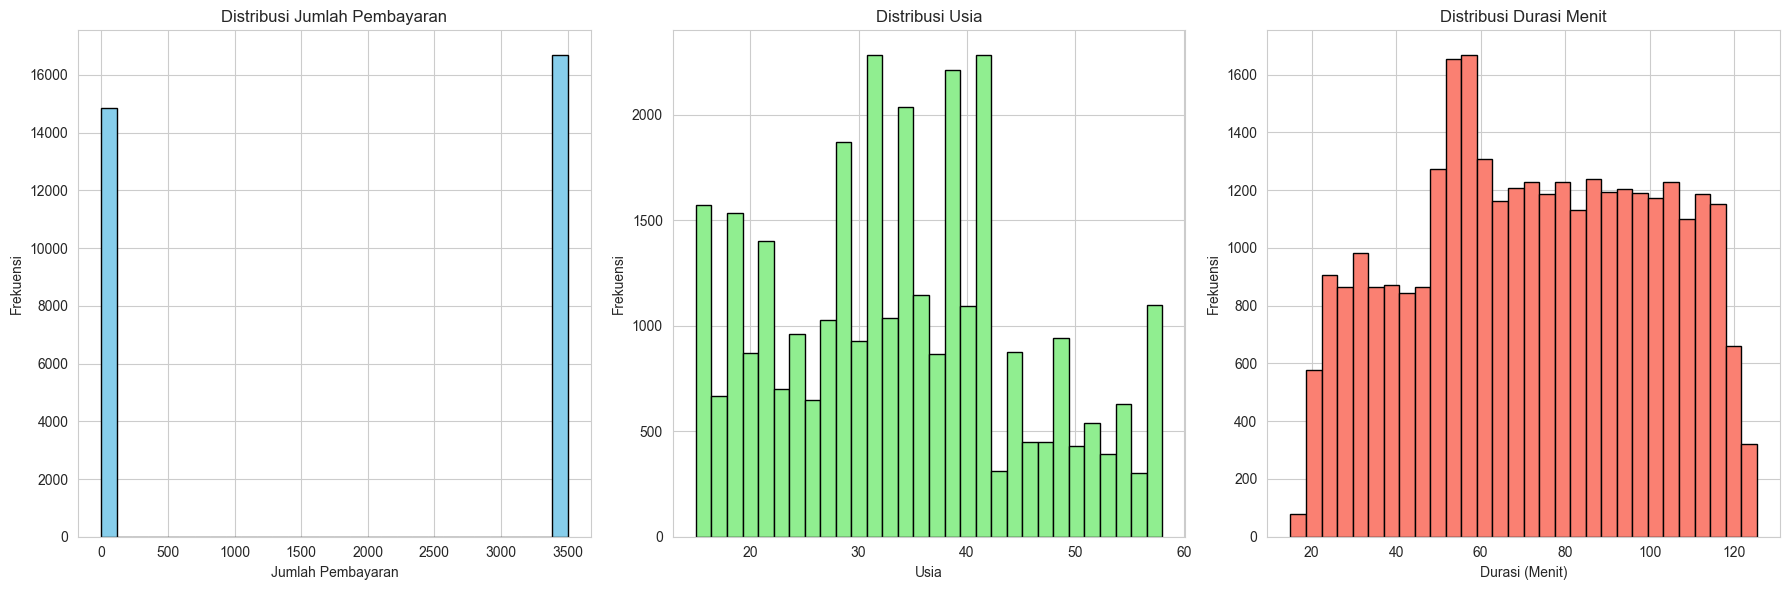

In [129]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(data['payamount'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Jumlah Pembayaran')
axes[0].set_xlabel('Jumlah Pembayaran')
axes[0].set_ylabel('Frekuensi')

axes[1].hist(data['age'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribusi Usia')
axes[1].set_xlabel('Usia')
axes[1].set_ylabel('Frekuensi')

axes[2].hist(data['durationminutes'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Distribusi Durasi Menit')
axes[2].set_xlabel('Durasi (Menit)')
axes[2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

---

# **_DATA ANALYSIS & DATA VISUALISATION_**

Kita sudah melakukan tahap *data cleaning*. Sekarang, kita bisa mulai melakukan analsis untuk mencari tahu bagaimana pola pergerakan penumpang dan faktor-faktor yang mempengaruhinya. Kita akan mengidentifikasi pola pergerakan penumpang, menghitung kepadatan penumpang diberbagai rute, dan mengevaluasi waktu tunggu dan durasi perjalanan. 

### **`Untuk menjawab permasalahan stakeholder untuk mengidentifikasi bagaimana pola pergerakan penumpang di berbagai rute maka diperlukan langkah-langkah analisis pada permasalahan tersebut:`** 

> **Analisis pada `corridorid` dan `corridorname`**

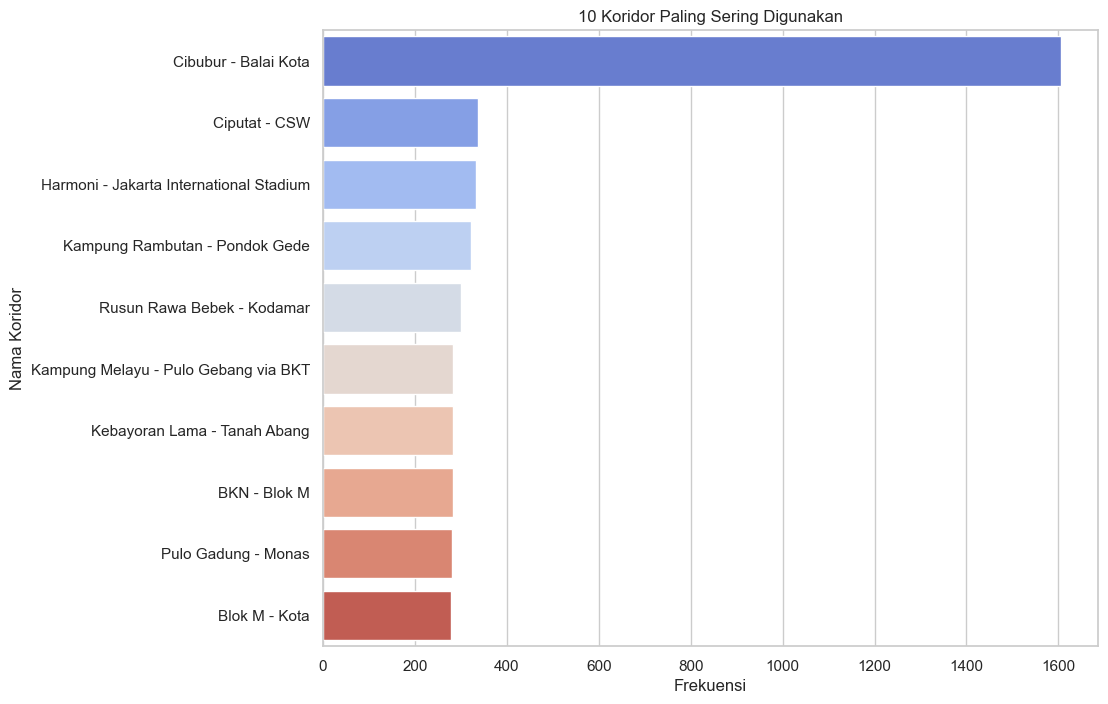

,Nama Koridor,Frekuensi
0,Cibubur - Balai Kota,1606
1,Ciputat - CSW,338
2,Harmoni - Jakarta International Stadium,332
3,Kampung Rambutan - Pondok Gede,323
4,Rusun Rawa Bebek - Kodamar,301
5,Kampung Melayu - Pulo Gebang via BKT,283
6,Kebayoran Lama - Tanah Abang,282
7,BKN - Blok M,282
8,Pulo Gadung - Monas,281
9,Blok M - Kota,279


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
corridor_counts = data['corridorname'].value_counts().reset_index()
corridor_counts.columns = ['Nama Koridor', 'Frekuensi']

plt.figure(figsize=(10, 8))
sns.barplot(x='Frekuensi', y='Nama Koridor', data=corridor_counts.head(10), palette='coolwarm')
plt.title('10 Koridor Paling Sering Digunakan')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Koridor')
plt.show()

corridor_counts.head(10)  

Dari analisis dan visualisasi data, berikut adalah beberapa insight, justifikasi, dan interpretasi yang dapat saya berikan:

**_Insight:_**

- **Rute Dominan:** Rute "Cibubur - Balai Kota" adalah yang paling sering digunakan, dengan frekuensi yang jauh lebih tinggi dibandingkan rute lain. Ini menunjukkan popularitas atau kebutuhan yang signifikan pada rute tersebut.

- **Keragaman Rute:** Terdapat keragaman dalam penggunaan rute, tetapi sebagian besar terkonsentrasi pada beberapa rute atas. Beberapa rute memiliki frekuensi yang hampir serupa, menunjukkan distribusi pengguna yang lebih merata.

**Justifikasi:**

- **Preferensi Rute:** Frekuensi penggunaan rute yang tinggi bisa disebabkan oleh beberapa faktor seperti jarak, kenyamanan, kepadatan penduduk di area tersebut, atau hubungan dengan titik-titik penting di kota.

- **Pengaruh Infrastruktur:** Infrastruktur dan kondisi lalu lintas mungkin berkontribusi pada popularitas rute tertentu, dengan beberapa koridor mungkin menawarkan perjalanan yang lebih cepat atau lebih nyaman.

**Interpretasi:**

- **Perencanaan dan Alokasi Sumber Daya:** Pihak stakeholder dapat menggunakan informasi ini untuk merencanakan alokasi sumber daya, seperti bus atau staf, lebih efisien. Rute dengan frekuensi tinggi mungkin memerlukan lebih banyak bus atau perbaikan infrastruktur untuk mengakomodasi volume penumpang.

- **Pengembangan Infrastruktur:** Mengetahui rute mana yang paling sering digunakan dapat membantu dalam merencanakan pengembangan infrastruktur masa depan atau peningkatan pada rute yang ada untuk meningkatkan efisiensi dan kenyamanan.

- **Pemahaman Pola Pergerakan:** Memahami pola pergerakan ini membantu pihak stakeholder dalam merancang strategi peningkatan layanan, dan inisiatif pengurangan kemacetan.

> **Analisis pada `tapinstops` dan `tapoutstops`**

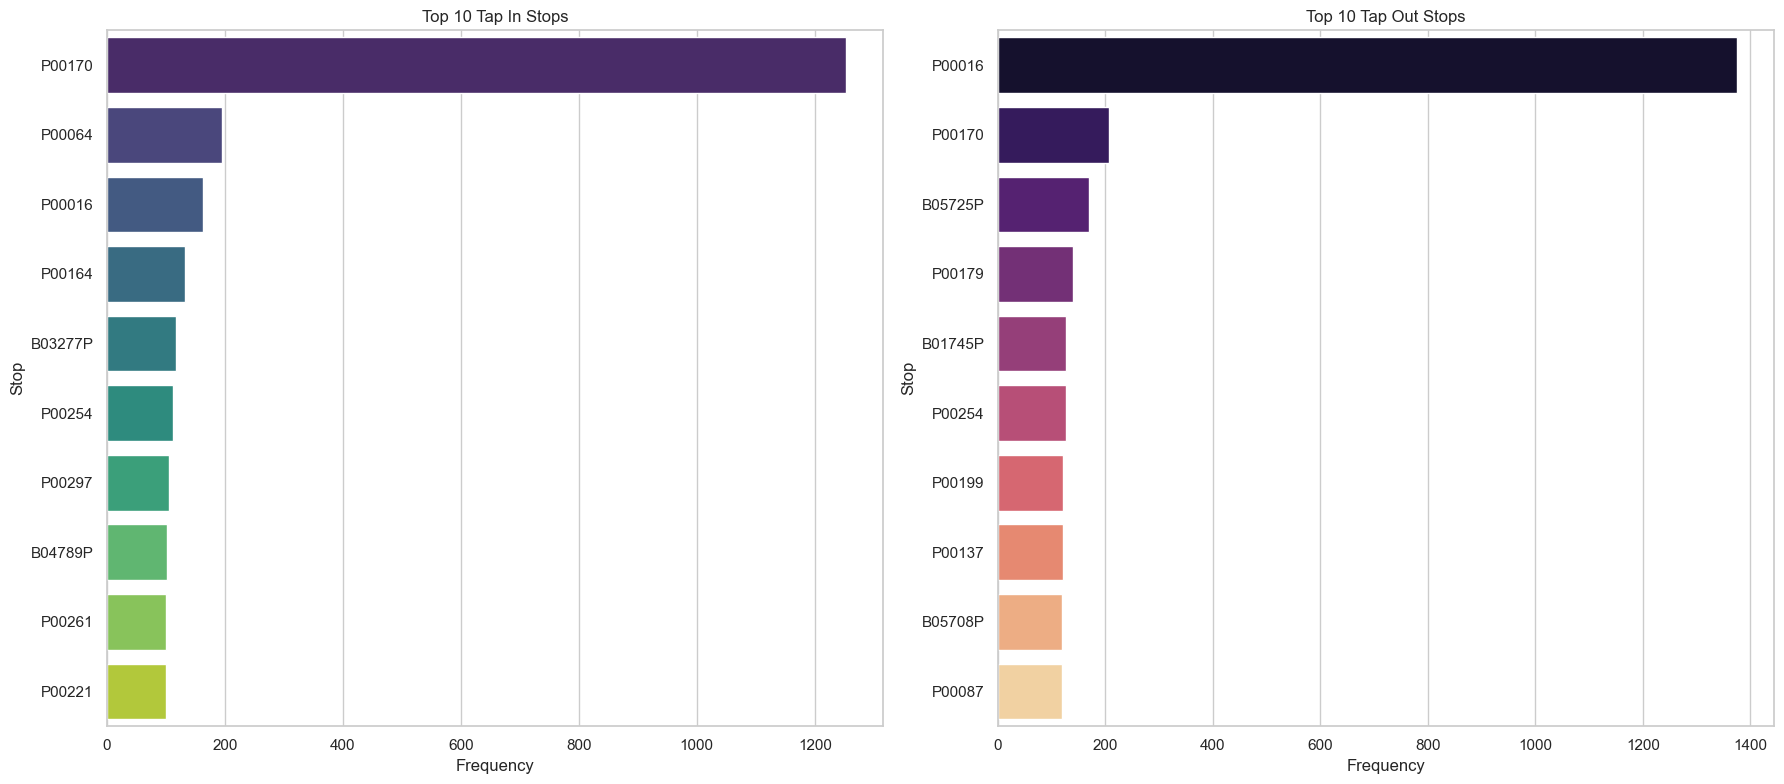

        Stop  Tap In Frequency
17    P00170              1253
37    P00064               196
168   P00016               163
209   P00164               132
161  B03277P               117
9     P00254               113
139   P00297               106
91   B04789P               102
200   P00261               101
521   P00221               101

        Stop  Tap Out Frequency
5     P00016               1375
150   P00170                207
74   B05725P                170
315   P00179                140
86   B01745P                127
236   P00254                126
242   P00199                122
31    P00137                122
463  B05708P                120
330   P00087                119


In [131]:
from collections import Counter

tap_in_counts = Counter(dfjep['tapinstops'])
tap_out_counts = Counter(dfjep['tapoutstops'])

tap_in_df = pd.DataFrame(tap_in_counts.items(), columns=['Stop', 'Tap In Frequency']).sort_values(by='Tap In Frequency', ascending=False)
tap_out_df = pd.DataFrame(tap_out_counts.items(), columns=['Stop', 'Tap Out Frequency']).sort_values(by='Tap Out Frequency', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x='Tap In Frequency', y='Stop', data=tap_in_df.head(10), ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Tap In Stops')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Stop')

sns.barplot(x='Tap Out Frequency', y='Stop', data=tap_out_df.head(10), ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Tap Out Stops')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Stop')

plt.tight_layout()
plt.show()

print(tap_in_df.head(10))
print()
print(tap_out_df.head(10))

Tujuan untuk menganalisis pada kolom `corridorid` dan `corridorname` untuk mengidentifikasi setiap rute yang berbeda.

**Insight:**

- **Titik Naik Dominan:** Lokasi dengan kode 'P00170' adalah tempat tap in paling populer, menunjukkan bahwa lokasi ini mungkin merupakan titik transit penting atau area dengan permintaan tinggi.

- **Titik Turun Dominan:** Sama halnya, 'P00016' adalah tempat tap out terbanyak, menunjukkan area ini sebagai destinasi penting atau hub untuk aktivitas lain.

- **Konsentrasi Titik:** Beberapa titik memiliki frekuensi tap in dan tap out yang signifikan dibandingkan lainnya, menunjukkan konsentrasi aktivitas di area tertentu.

**Justifikasi:**

- **Kebutuhan dan Preferensi:** Frekuensi tap in dan tap out yang tinggi di lokasi tertentu menunjukkan kebutuhan transportasi yang tinggi, mungkin karena dekat dengan pusat bisnis, area perumahan, atau fasilitas publik.

- **Kemudahan Akses:** Lokasi ini mungkin menawarkan akses yang lebih mudah atau lebih nyaman, mempengaruhi keputusan penumpang untuk naik atau turun di sana.

**Interpretasi:**

- **Perencanaan Kapasitas:** Data ini memberikan wawasan penting tentang mana halte yang paling sibuk, memungkinkan stakeholder untuk meningkatkan kapasitas atau menyediakan layanan tambahan di titik-titik tersebut.

- **Peningkatan Layanan dan Fasilitas:** Pihak stakeholder dapat mengeksplorasi peningkatan fasilitas atau layanan di halte dengan aktivitas tinggi untuk meningkatkan pengalaman penumpang.

- **Strategi Intervensi:** Untuk mengurangi kemacetan di halte sibuk, dapat dijajaki alternatif rute atau penyebaran waktu layanan.

> **Analisis pada `tapintime` dan `tapouttime`**

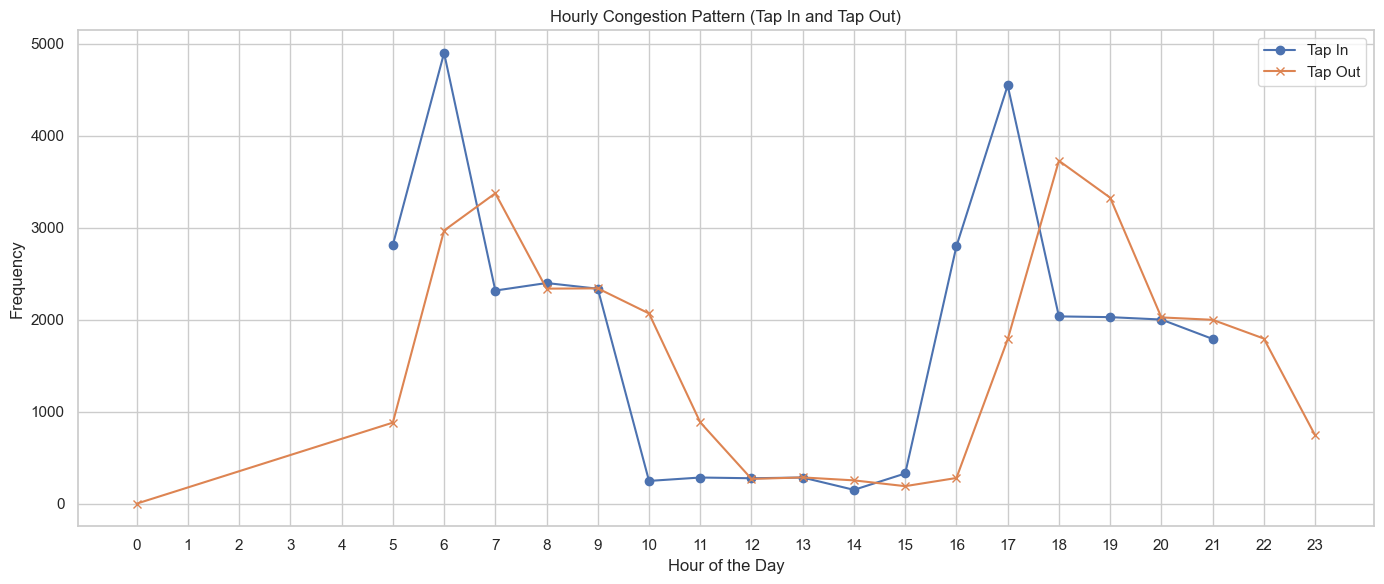

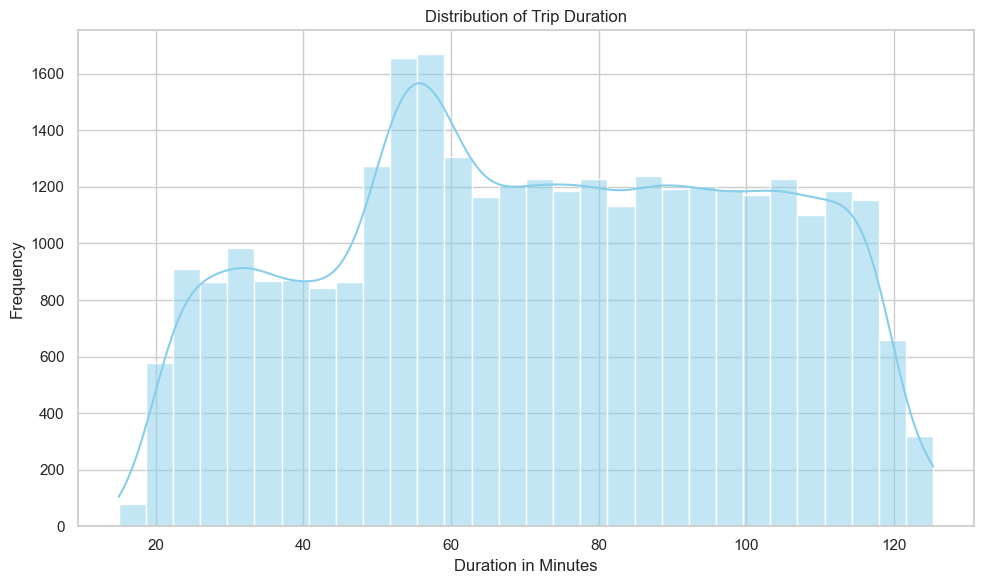

count      17.000000
mean     1856.352941
std      1466.820965
min       151.000000
25%       285.000000
50%      2029.000000
75%      2400.000000
max      4902.000000
Name: count, dtype: float64

count      20.000000
mean     1577.900000
std      1205.860859
min         1.000000
25%       284.500000
50%      1791.500000
75%      2339.750000
max      3730.000000
Name: count, dtype: float64

count    31558.000000
mean        72.403849
std         28.145101
min         15.000000
25%         51.237500
50%         72.116667
75%         96.279167
max        125.329000
Name: durationminutes, dtype: float64


In [132]:
import numpy as np

# Mengonversi tapintime dan tapouttime ke datetime
data['tapintime'] = pd.to_datetime(data['tapintime'])
data['tapouttime'] = pd.to_datetime(data['tapouttime'])

# Ekstrak jam untuk analisis pola kemacetan
data['tapin_hour'] = data['tapintime'].dt.hour
data['tapout_hour'] = data['tapouttime'].dt.hour

# Menganalisis pola kemacetan berdasarkan waktu tap in dan tap out
tap_in_hourly = data['tapin_hour'].value_counts().sort_index()
tap_out_hourly = data['tapout_hour'].value_counts().sort_index()

# Memetakan pola kemacetan
plt.figure(figsize=(14, 6))
plt.plot(tap_in_hourly.index, tap_in_hourly.values, label='Tap In', marker='o')
plt.plot(tap_out_hourly.index, tap_out_hourly.values, label='Tap Out', marker='x')
plt.title('Hourly Congestion Pattern (Tap In and Tap Out)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 24, 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Menganalisis dan memvisualisasikan durasi perjalanan
plt.figure(figsize=(10, 6))
sns.histplot(data['durationminutes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(tap_in_hourly.describe()) 
print()
print(tap_out_hourly.describe()) 
print()
print(data['durationminutes'].describe())

Tujuan untuk menganalisa kolom pada `tapintime` dan `tapouttime` untuk menganalisis waktu perjalanan dan pola kepadatan selama berbagai periode. 

***Visualisasi 1:** Grafik kepadatan per jam menunjukkan pola khas dengan puncak kepadatan pada jam-jam tertentu, mengindikasikan waktu sibuk.*

**Insight:**

- **Puncak Kepadatan:** Ada peningkatan signifikan dalam tap in dan tap out selama jam-jam tertentu, khususnya di pagi dan sore hari, yang mencerminkan jam sibuk perjalanan.

- **Perbedaan Pola:** Meski pola umumnya serupa, ada perbedaan kecil antara waktu tap in dan tap out, yang mungkin mencerminkan perbedaan dalam pola perjalanan ke dan dari kerja atau sekolah.

**Justifikasi:**

- **Ritme Harian:** Pola ini sesuai dengan ritme harian kota, di mana orang berangkat kerja atau sekolah di pagi hari dan pulang di sore atau malam hari.

**Interpretasi:**

- **Pengelolaan Permintaan:** Pihak stakeholder dapat menyesuaikan frekuensi dan kapasitas layanan selama jam sibuk untuk mengurangi kepadatan dan meningkatkan pengalaman penumpang.

- **Intervensi Terfokus:** Menargetkan waktu dan lokasi dengan kepadatan tinggi untuk intervensi seperti peningkatan fasilitas dapat membantu mengurangi kemacetan.

***Visualisasi 2:** Distribusi durasi perjalanan menunjukkan variasi dalam waktu yang dihabiskan penumpang dalam perjalanan.*

**Insight:**

- **Variabilitas Durasi:** Ada variasi lebar dalam durasi perjalanan, dengan sebagian besar perjalanan berkisar antara 15 hingga 125 menit.

- **Puncak Durasi:** Puncak distribusi terletak di sekitar 50 hingga 100 menit, menunjukkan durasi perjalanan rata-rata.

**Justifikasi:**

- **Faktor-faktor yang Mempengaruhi:** Durasi perjalanan bisa dipengaruhi oleh faktor-faktor seperti jarak, kondisi lalu lintas, dan jumlah pemberhentian di sepanjang rute.

**Interpretasi:**

- **Optimisasi Rute:** Data durasi bisa digunakan untuk mengidentifikasi rute yang secara konsisten mengalami keterlambatan dan memerlukan peningkatan.

- **Pemahaman Preferensi:** Durasi yang lebih lama mungkin menunjukkan kebutuhan untuk rute alternatif yang lebih efisien atau perbaikan pada jadwal.

**Insight yang dapat dipahami dari analisis diatas sebagai berikut:**

1. **Pola Pergerakan:** Terdapat pola pergerakan yang jelas berdasarkan waktu dan lokasi, dengan jam sibuk dan halte tertentu menunjukkan kepadatan tinggi.

2. **Variabilitas Durasi:** Durasi perjalanan menunjukkan variasi yang signifikan, mempengaruhi pengalaman penumpang dan efisiensi perjalanan.

**Oleh karena itu sesuai dengan analisis yang sudah dilakukan diata maka bisa ditarik kesimpulan dan dapat memberikan rekomendasi kepada pihak _stakeholder_ terkait hal untuk memahami pola pergerakan penumpang di berbagai rute ini akan membantu dalam menyesuaikan jadwal dan rute untuk mengurangi waktu tunggu dan penumpang berdesakan. Berikut ini Kesimpulan dan Rekomendasi yang bisa diberikan kepada _stakeholder_:**

**Rekomendasi:**

- **Manajemen Jam Sibuk:** Tingkatkan layanan dan kapasitas selama jam sibuk untuk mengurangi kemacetan dan meningkatkan kenyamanan.

- **Optimisasi Rute:** Analisis rute dengan durasi panjang untuk potensi peningkatan efisiensi.
Fasilitas Halte: Tingkatkan fasilitas di halte dengan aktivitas tinggi untuk mengakomodasi penumpang dan memperlancar aliran.

**Kesimpulan:**
Pemahaman yang mendalam tentang pola pergerakan penumpang, kepadatan, dan durasi perjalanan dapat membantu stakeholder dalam mengambil keputusan yang tepat untuk meningkatkan layanan dan efisiensi. Analisis ini menawarkan panduan untuk intervensi yang ditargetkan, perencanaan yang lebih baik, dan alokasi sumber daya yang lebih efektif

---

### **`Untuk menjawab permasalahan stakeholder untuk mengidentifikasi apakah ada rute yang secara konsisten mengalami kepadatan penumpang, maka diperlukan langkah-langkah analisis pada permasalahan tersebut:`** 

Untuk menjawab pertanyaan permasalahan diatas, perlu langkah-langkah dalam melakukan analisis data pada kolom `corridorid`, `corridorname`, `tapinstops`, `tapoutstops`, `paycardid`, `tapintime` dan `tapouttime` namun untuk visualisasi untuk pada kolom corridorid, corridorname, tapinstops, tapoutstops, tapintime, dan tapouttime diatas. maka hanya menampilkan visualisasi pada analisis data kolom paycardid

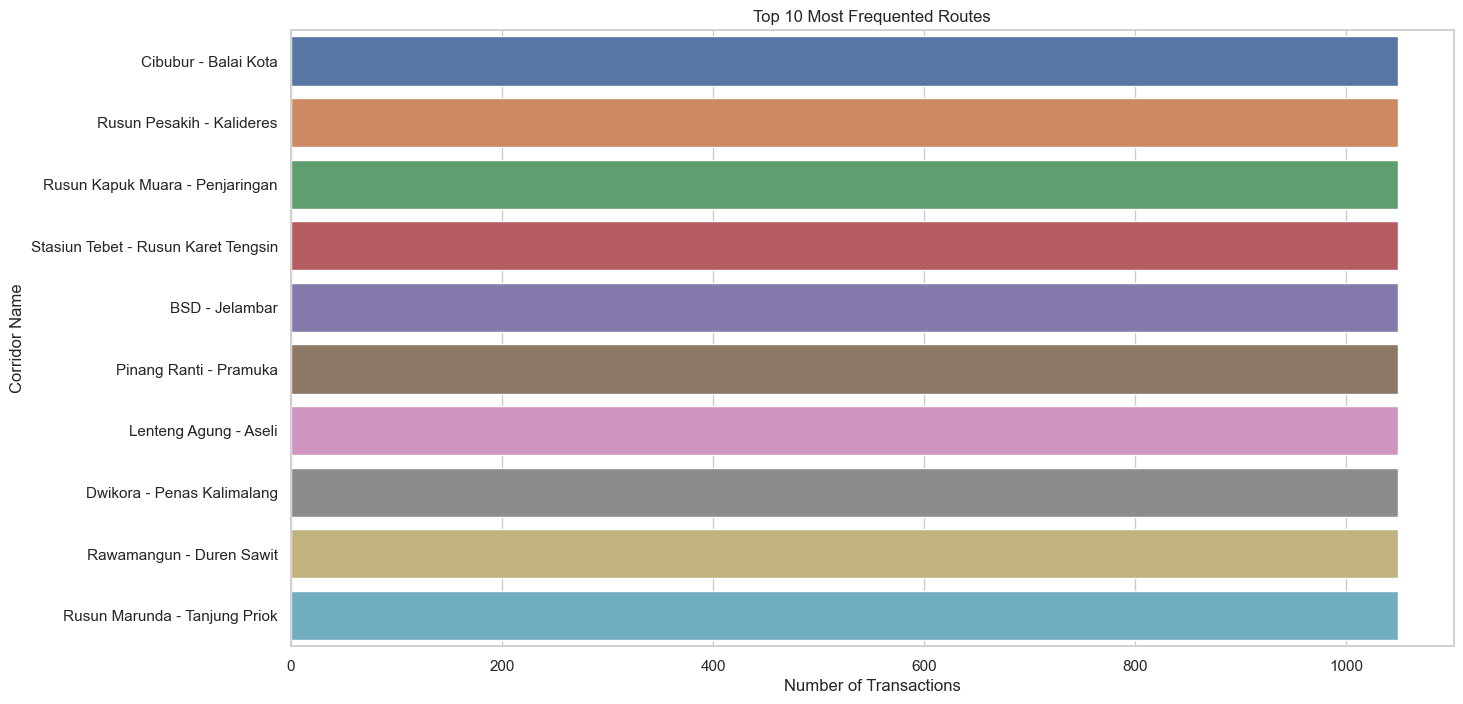

(   corridorid  count                         corridorname
 0          1T   1049                 Cibubur - Balai Kota
 55         1T   1049            Rusun Pesakih - Kalideres
 64         1T   1049      Rusun Kapuk Muara - Penjaringan
 63         1T   1049  Stasiun Tebet - Rusun Karet Tengsin
 62         1T   1049                       BSD - Jelambar
 61         1T   1049               Pinang Ranti - Pramuka
 59         1T   1049                Lenteng Agung - Aseli
 58         1T   1049           Dwikora - Penas Kalimalang
 57         1T   1049             Rawamangun - Duren Sawit
 56         1T   1049        Rusun Marunda - Tanjung Priok,
 (484, 2))

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_corridors = dfjep[['corridorid', 'corridorname']].drop_duplicates()
route_frequency = dfjep['corridorid'].value_counts().reset_index()
route_frequency.columns = ['corridorid', 'count']
route_frequency = route_frequency.merge(unique_corridors, on='corridorid', how='left')
route_frequency = route_frequency.sort_values(by='count', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='count', y='corridorname', data=route_frequency.head(10))
plt.title('Top 10 Most Frequented Routes')
plt.xlabel('Number of Transactions')
plt.ylabel('Corridor Name')
plt.show()

route_frequency.head(10), unique_corridors.shape

Hasil analisis dan visualisasi data rute (corridor), terdapat 10 rute dengan frekuensi tertinggi: Diagram batang menunjukkan 10 rute dengan jumlah transaksi tertinggi. Menariknya, tampaknya 'corridorid' yang berlabel "1T" terkait dengan beberapa nama koridor, yang menunjukkan frekuensi penggunaan yang mungkin tinggi di berbagai rute. Berikut adalah koridor-koridor dengan transaksi terbanyak:

Cibubur - Balai Kota <br>
Rusun Pesakih - Kalideres<br>
Rusun Kapuk Muara - Penjaringan <br>
Stasiun Tebet - Rusun Karet Tengsin <br>
BSD - Jelambar <br>
Pinang Ranti - Pramuka <br>
Lenteng Agung - Aseli <br>
Dwikora - Penas Kalimalang <br>
Rawamangun - Duren Sawit <br>
Rusun Marunda - Tanjung Priok <br>

**Insight dan Interpretasi:**

- Rute dengan label "1T" muncul beberapa kali dengan nama yang berbeda, yang mungkin menunjukkan adanya kesamaan atau kategorisasi dalam sistem rute. Klafirikasi lebih lanjut dari penyedia dataset atau pemeriksaan data yang lebih mendetail mungkin diperlukan untuk memahami keanehan ini.

- Rute yang paling sering digunakan dapat mengindikasikan area dengan permintaan lebih tinggi, mungkin karena kepadatan penduduk, tujuan utama, atau kurangnya alternatif transportasi.

- Memahami konteks rute ini dari segi lokasi geografis, waktu dalam sehari, dan demografi pengguna dapat memberikan wawasan lebih dalam mengapa rute tertentu lebih populer.

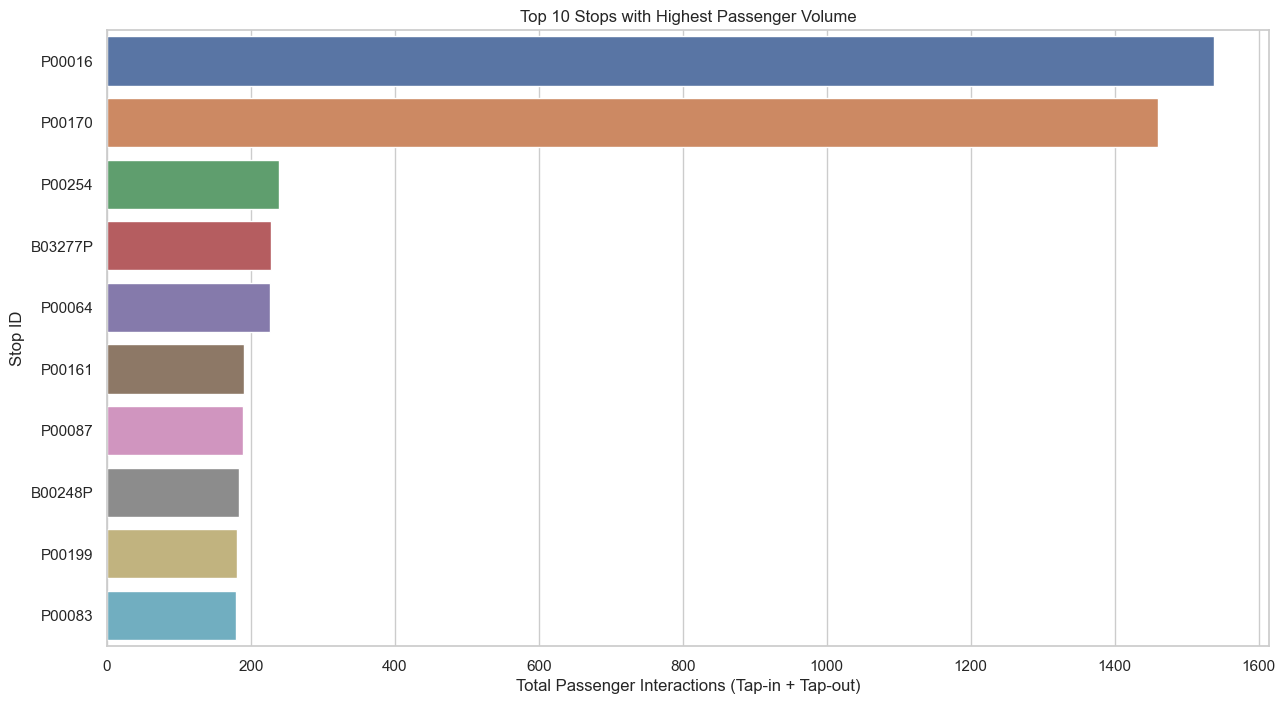

,tapinstops,tapin_count,tapoutstops,tapout_count,total_count
2,P00016,163.0,P00016,1375.0,1538.0
0,P00170,1253.0,P00170,207.0,1460.0
5,P00254,113.0,P00254,126.0,239.0
4,B03277P,117.0,B03277P,111.0,228.0
1,P00064,196.0,P00064,30.0,226.0
31,P00161,75.0,P00161,116.0,191.0
33,P00087,70.0,P00087,119.0,189.0
17,B00248P,87.0,B00248P,96.0,183.0
56,P00199,59.0,P00199,122.0,181.0
29,P00083,76.0,P00083,104.0,180.0


In [134]:
tapin_counts = dfjep['tapinstops'].value_counts().reset_index()
tapin_counts.columns = ['tapinstops', 'tapin_count']
tapout_counts = dfjep['tapoutstops'].value_counts().reset_index()
tapout_counts.columns = ['tapoutstops', 'tapout_count']

stop_counts = tapin_counts.merge(tapout_counts, left_on='tapinstops', right_on='tapoutstops', how='outer')
stop_counts['total_count'] = stop_counts['tapin_count'] + stop_counts['tapout_count'] 

stop_counts = stop_counts.sort_values(by='total_count', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='total_count', y='tapinstops', data=stop_counts.head(10))
plt.title('Top 10 Stops with Highest Passenger Volume')
plt.xlabel('Total Passenger Interactions (Tap-in + Tap-out)')
plt.ylabel('Stop ID')
plt.show()

stop_counts.head(10)

Hasil analisis dan visualisasi data data tap-in atau tap-out, terdapat 10 halte dengan volume penumpang tertinggi: Diagram batang menunjukkan 10 halte dengan total interaksi penumpang (tap-in dan tap-out) tertinggi. Berikut adalah halte dengan volume penumpang total tertinggi:

Halte ID P00016 - 1.538 interaksi total
Halte ID P00170 - 1.460 interaksi total
Halte ID P00254 - 239 interaksi total
Halte ID B03277P - 228 interaksi total
Halte ID P00064 - 226 interaksi total
Halte ID P00161 - 191 interaksi total
Halte ID P00087 - 189 interaksi total
Halte ID B00248P - 183 interaksi total
Halte ID P00199 - 181 interaksi total
Halte ID P00083 - 180 interaksi total

**Wawasan dan Interpretasi:**

- **Halte Volume Tinggi:** Halte P00016 dan P00170 sangat menonjol dengan volume penumpang tertinggi. Halte-halte ini mungkin merupakan hub transit kunci, terletak di distrik bisnis pusat, dekat dengan tujuan populer, atau titik transfer antar rute.

- **Distribusi Interaksi:** Beberapa halte memiliki jumlah tap-in dan tap-out yang seimbang, sementara yang lain condong ke salah satu. Misalnya, Halte P00016 memiliki jumlah tap-out yang tinggi dibandingkan tap-in, yang mungkin menunjukkan sebagai titik tujuan yang umum.

- **Implikasi Perencanaan dan Manajemen:** Memahami pola ini sangat penting untuk mengelola kapasitas layanan, meningkatkan aliran penumpang, dan merencanakan kebutuhan infrastruktur masa depan. Data menunjukkan di mana fokus upaya harus diberikan untuk peningkatan fasilitas, peningkatan frekuensi layanan, atau fasilitas tambahan.

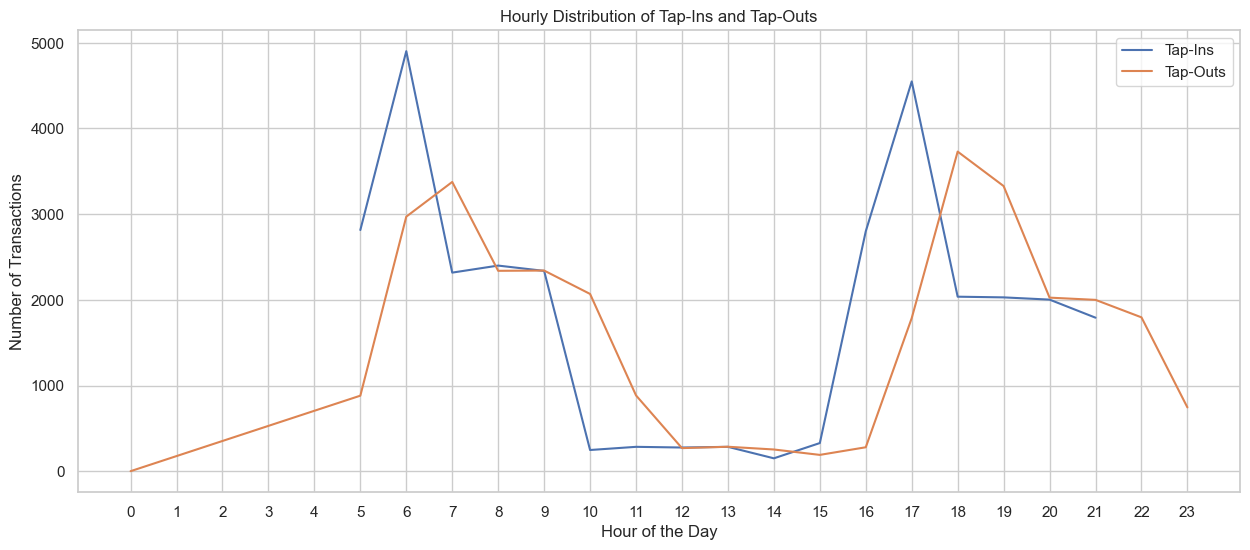

(1738,
 taphour_in
 5    2815
 6    4902
 7    2318
 8    2400
 9    2338
 Name: count, dtype: int64,
 taphour_out
 0       1
 5     882
 6    2971
 7    3376
 8    2339
 Name: count, dtype: int64)

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

unique_passengers = dfjep['paycardid'].nunique()
dfjep['tapintime'] = pd.to_datetime(dfjep['tapintime'])
dfjep['tapouttime'] = pd.to_datetime(dfjep['tapouttime'])
dfjep['taphour_in'] = dfjep['tapintime'].dt.hour
dfjep['taphour_out'] = dfjep['tapouttime'].dt.hour
hourly_tapin = dfjep['taphour_in'].value_counts().sort_index()
hourly_tapout = dfjep['taphour_out'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
plt.plot(hourly_tapin.index, hourly_tapin.values, label='Tap-Ins')
plt.plot(hourly_tapout.index, hourly_tapout.values, label='Tap-Outs')
plt.title('Hourly Distribution of Tap-Ins and Tap-Outs')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

unique_passengers, hourly_tapin.head(), hourly_tapout.head()

- **Visualisasi Distribusi Jam Sibuk:** Grafik menunjukkan distribusi transaksi tap-in dan tap-out setiap jam. Dari data, terlihat bahwa:

**Pagi Hari:** Ada puncak yang signifikan dalam aktivitas tap-in antara jam 6 sampai 7 pagi, menandakan waktu berangkat kerja.

**Sore Hari:** Puncak aktivitas tap-out terjadi antara jam 7 sampai 8 pagi, kemungkinan saat orang tiba di tujuan mereka.

**Insight, Justifikasi, dan Interpretasi**
**Untuk Penumpang Unik:**

- Insight: Jumlah penumpang unik memberikan gambaran tentang seberapa luas sistem transit digunakan. Angka yang lebih tinggi menunjukkan variasi yang lebih besar dalam penggunaan oleh penumpang.

- Justifikasi: Menggunakan 'paycardid' memberikan cara yang efektif untuk mengestimasi jumlah penumpang individu tanpa data pribadi yang sensitif.

- Interpretasi: Jumlah penumpang yang relatif tinggi menunjukkan sistem transit yang digunakan secara luas, penting untuk perencanaan kapasitas dan infrastruktur.

**Untuk Jam Sibuk:**

- Insight: Jam sibuk mengindikasikan waktu ketika permintaan akan transportasi umum paling tinggi.

- Justifikasi: Memahami jam sibuk membantu dalam pengalokasian sumber daya, penjadwalan, dan peningkatan layanan untuk mengakomodasi peningkatan permintaan.

- Interpretasi: Puncak aktivitas di pagi dan sore hari menunjukkan pola perjalanan standar ke dan dari tempat kerja atau sekolah. Menyesuaikan layanan di waktu-waktu ini dapat meningkatkan efisiensi dan kepuasan penumpang.

**Rekomendasi:**

**Manajemen Kapasitas:** Tingkatkan frekuensi atau kapasitas layanan di rute dan jam sibuk untuk mengurangi kepadatan dan meningkatkan kenyamanan.

**Pemantauan dan Penyesuaian:** Gunakan data waktu nyata untuk pemantauan aktif dan penyesuaian layanan sesuai dengan perubahan pola penumpang.

**Komunikasi dengan Penumpang:** Berikan informasi terkini tentang kepadatan dan waktu tunggu untuk membantu penumpang merencanakan perjalanan mereka.

**Kesimpulan:**

Analisis menunjukkan bahwa ada rute dan waktu tertentu yang secara konsisten mengalami kepadatan penumpang. Dengan memahami dan merespons dinamika ini, stakeholder dapat meningkatkan efisiensi sistem transit dan pengalaman penumpang secara keseluruhan. Solusi yang ditargetkan berdasarkan data dapat mengarah pada peningkatan layanan dan kepuasan penumpang. ​